# Feature Engineering Section

In [51]:
# Importing all neded imports

import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import mode
import plotly.express as px
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

import warnings
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import mode, entropy
from scipy.signal import butter, filtfilt
from scipy.fft import fft
from scipy.stats import skew, kurtosis
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn_extra.cluster import KMedoids

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [52]:
# reading data frame
final_df= pd.read_csv('pre_feature_engineering_data.csv', index_col=None)

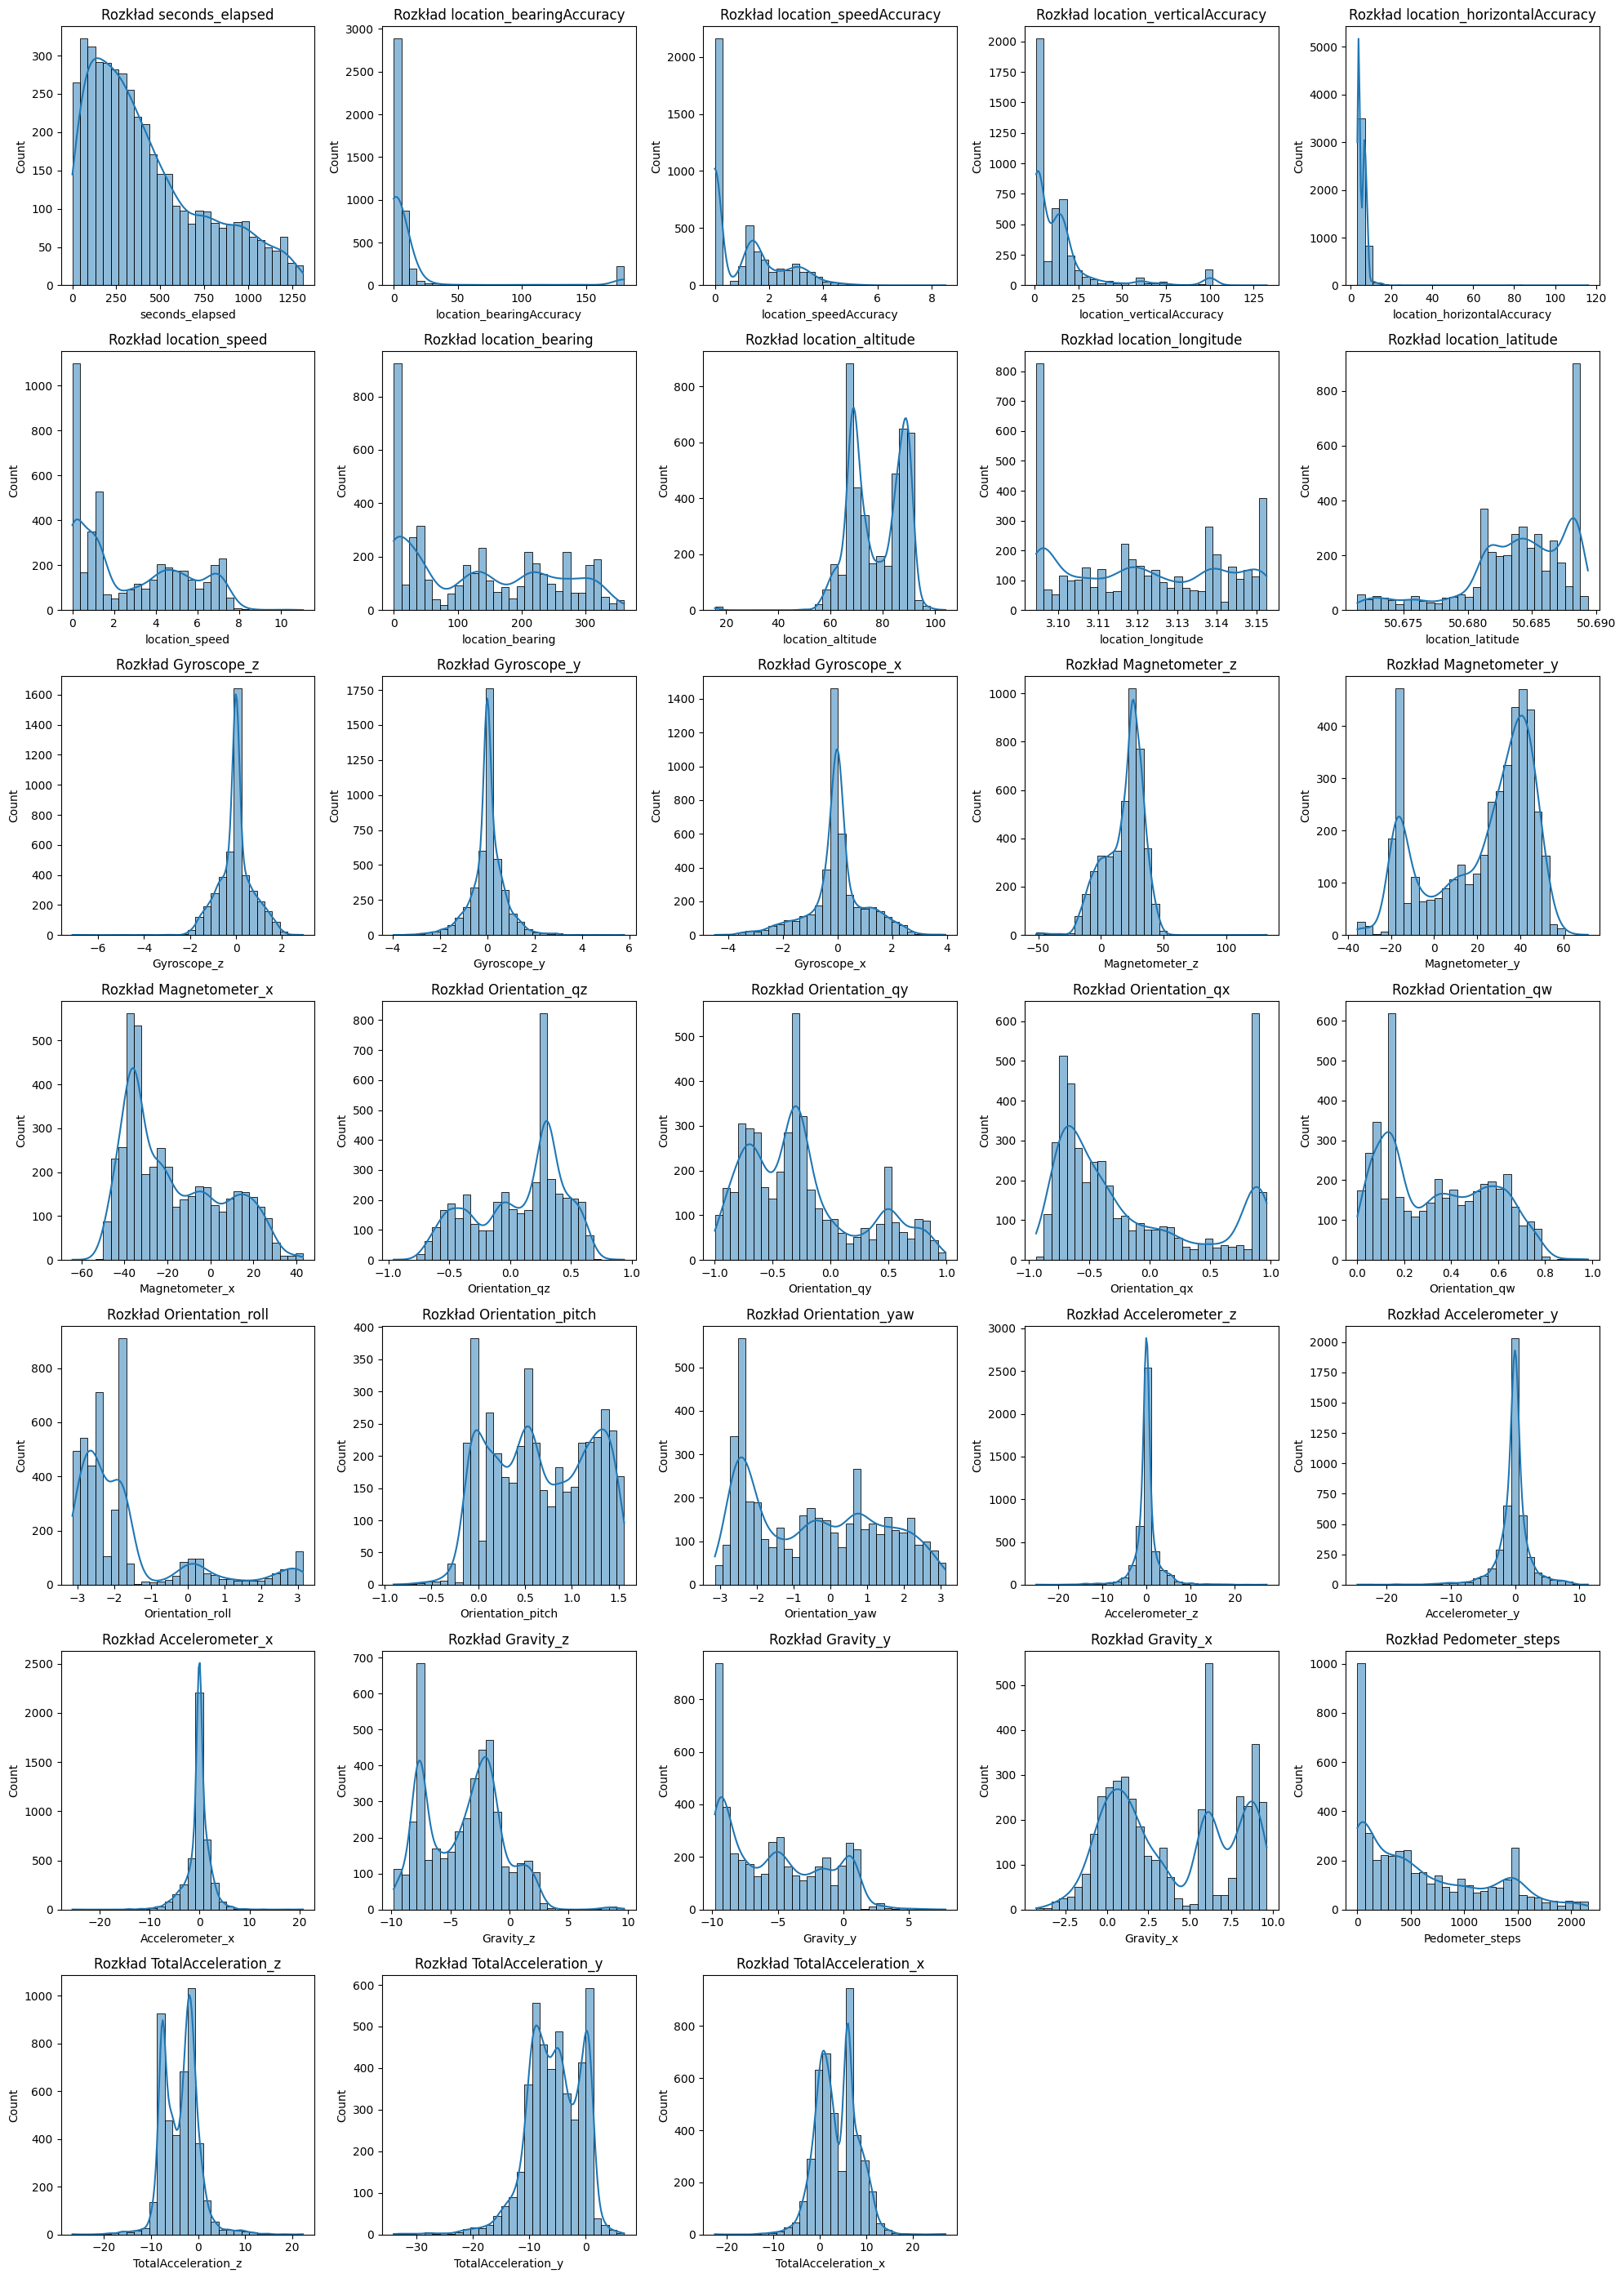

In [53]:
#checking once again distributions

# Funkcja do tworzenia histogramów dla wszystkich kolumn w DataFrame
def plot_distributions(df, cols_per_row=5):
    # Wybierz kolumny numeryczne
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    num_cols = len(numeric_cols)
    num_rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)

    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 4 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f'Rozkład {col}')

    # Wyłącz puste osie
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Wywołanie funkcji do tworzenia wykresów
plot_distributions(final_df)

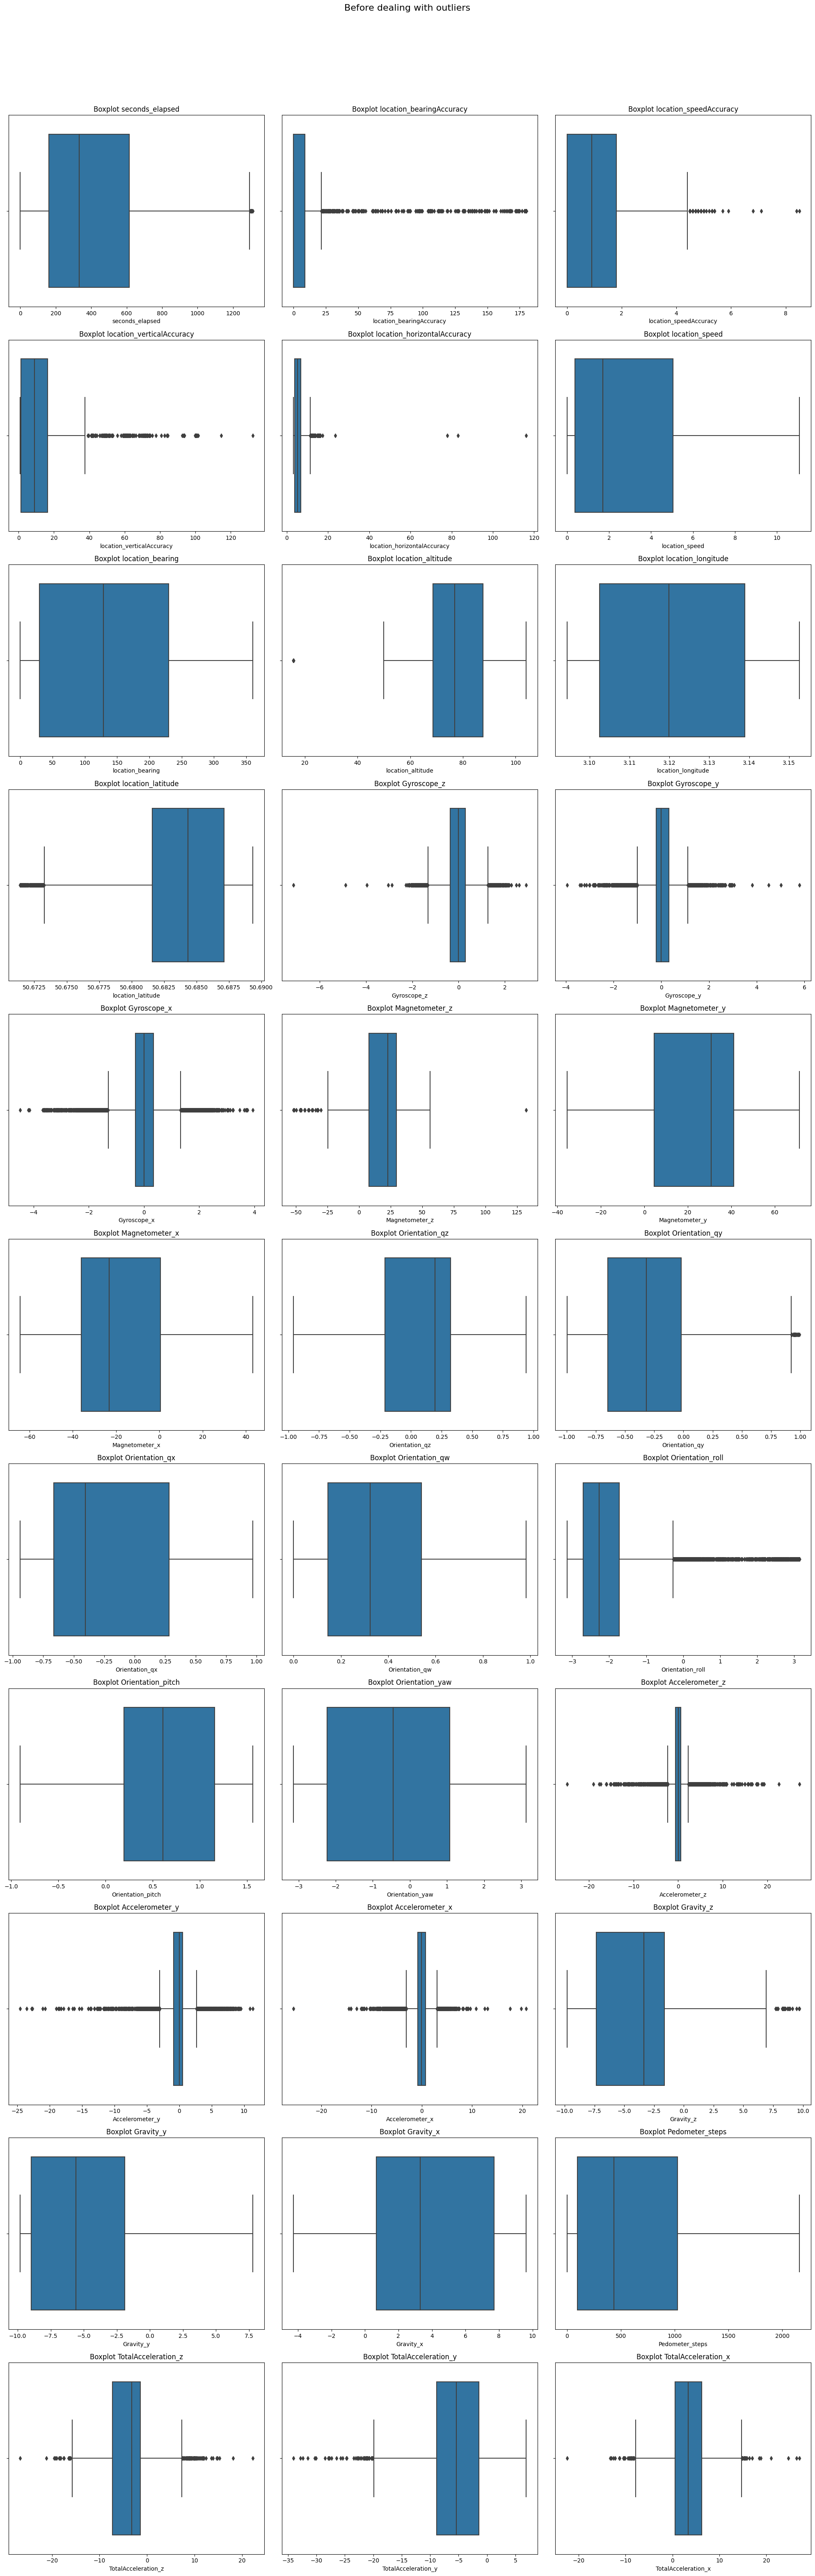

In [54]:
def plot_boxplots(df, cols_per_row=3, title="Boxplots"):
    # Wybierz kolumny numeryczne
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    num_cols = len(numeric_cols)
    num_rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)

    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.boxplot(x=df[col].dropna(), ax=axes[i])
        axes[i].set_title(f'Boxplot {col}')

    # Wyłącz puste osie
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Dodanie tytułu do całej figury
    fig.suptitle(title, fontsize=16)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Załaduj dane (jeśli nie są już załadowane)
# merged_df = pd.read_csv('path_to_your_file.csv')

# Wywołanie funkcji do tworzenia wykresów
plot_boxplots(final_df, title="Before dealing with outliers")

In [55]:
#Replacing outliers with interquartile range (IQR) limits

def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))


#checking what features require changing outliers
cap_outliers_iqr(final_df, 'location_verticalAccuracy')
cap_outliers_iqr(final_df, 'location_speedAccuracy')
cap_outliers_iqr(final_df, 'location_horizontalAccuracy')
cap_outliers_iqr(final_df, 'location_bearingAccuracy')
cap_outliers_iqr(final_df, 'location_latitude')
cap_outliers_iqr(final_df, 'Gyroscope_z')
cap_outliers_iqr(final_df, 'Gyroscope_y')
cap_outliers_iqr(final_df, 'Gyroscope_x')
cap_outliers_iqr(final_df, 'Magnetometer_z')
cap_outliers_iqr(final_df, 'Orientation_qy')
cap_outliers_iqr(final_df, 'Orientation_roll')
cap_outliers_iqr(final_df, 'Accelerometer_z')
cap_outliers_iqr(final_df, 'Accelerometer_y')
cap_outliers_iqr(final_df, 'Accelerometer_x')
cap_outliers_iqr(final_df, 'Gravity_z')
cap_outliers_iqr(final_df, 'TotalAcceleration_y')
cap_outliers_iqr(final_df, 'TotalAcceleration_x')
cap_outliers_iqr(final_df, 'TotalAcceleration_z')

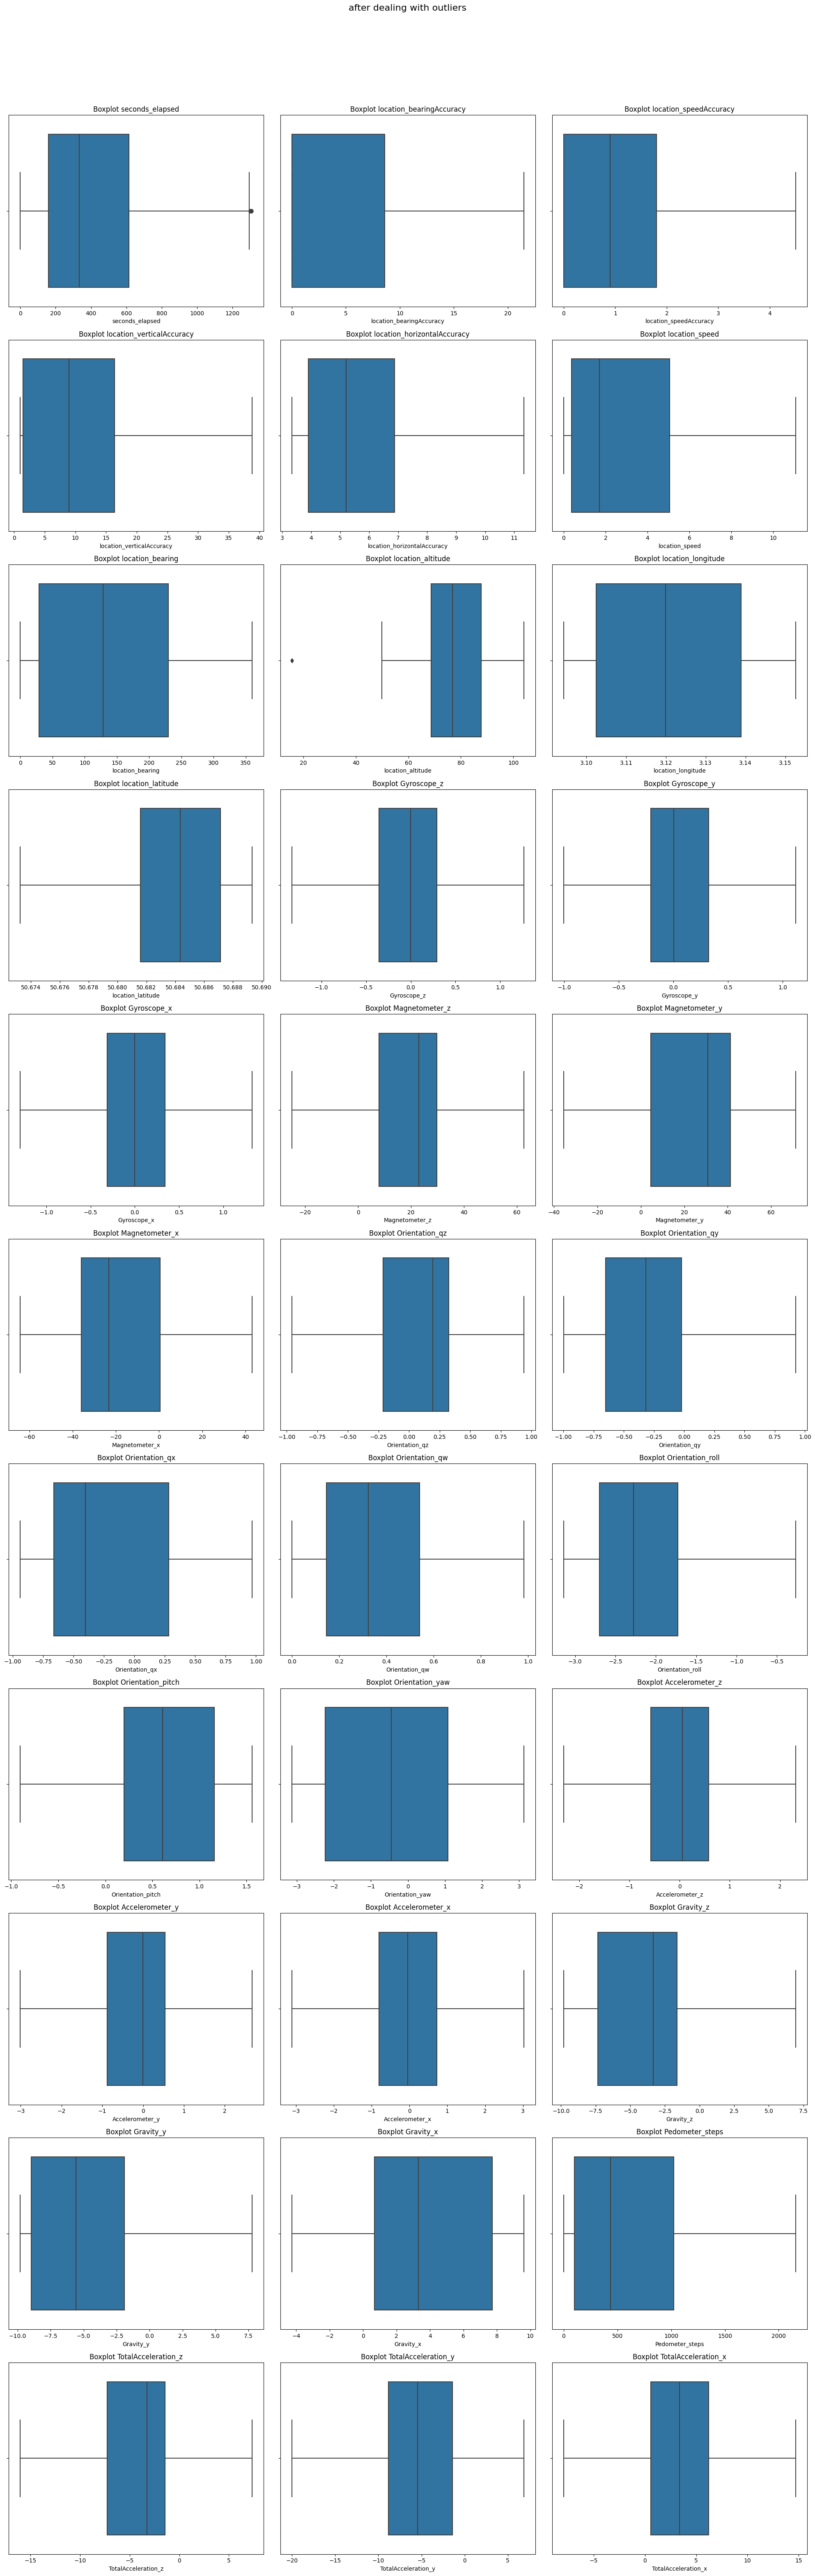

In [56]:
plot_boxplots(final_df, title="after dealing with outliers")

In [57]:
#there are no null values
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time                         4400 non-null   object 
 1   seconds_elapsed              4400 non-null   float64
 2   location_bearingAccuracy     4400 non-null   float64
 3   location_speedAccuracy       4400 non-null   float64
 4   location_verticalAccuracy    4400 non-null   float64
 5   location_horizontalAccuracy  4400 non-null   float64
 6   location_speed               4400 non-null   float64
 7   location_bearing             4400 non-null   float64
 8   location_altitude            4400 non-null   float64
 9   location_longitude           4400 non-null   float64
 10  location_latitude            4400 non-null   float64
 11  Gyroscope_z                  4400 non-null   float64
 12  Gyroscope_y                  4400 non-null   float64
 13  Gyroscope_x       

<b>Pitch</b>: Pitch angle along the X axis<br>
<b>Rol</b>: The angle of inclination along the Y axis<br>


<b>Angle ratios</b>: Can reveal the proportions between different axes of movement, which is important in distinguishing activity<br>
<b>Angle differences</b>: May indicate changes in body orientation in different planes.

In [58]:
# Tworzenie stosunków między kątami
final_df['pitch_roll_ratio'] = final_df['Orientation_pitch'] / final_df['Orientation_roll']
final_df['pitch_yaw_ratio'] = final_df['Orientation_pitch'] / final_df['Orientation_yaw']
final_df['roll_yaw_ratio'] = final_df['Orientation_roll'] / final_df['Orientation_yaw']

# Tworzenie bezwzględnych wartości stosunków
final_df['abs_pitch_roll_ratio'] = abs(final_df['pitch_roll_ratio'])
final_df['abs_pitch_yaw_ratio'] = abs(final_df['pitch_yaw_ratio'])
final_df['abs_roll_yaw_ratio'] = abs(final_df['roll_yaw_ratio'])

# Tworzenie różnic kątów
final_df['pitch_roll_diff'] = final_df['Orientation_pitch'] - final_df['Orientation_roll']
final_df['pitch_yaw_diff'] = final_df['Orientation_pitch'] - final_df['Orientation_yaw']
final_df['roll_yaw_diff'] = final_df['Orientation_roll'] - final_df['Orientation_yaw']

<b>acceleration_magnitude</b>: the magnitude of the acceleration vector. Can be calculated this way: $ \sqrt{x^2 + y^2 + z^2} $<br>

In [59]:
# Obliczanie wielkości wektora przyspieszenia
final_df['acceleration_magnitude'] = np.sqrt(final_df['Accelerometer_x']**2 + final_df['Accelerometer_y']**2 + final_df['Accelerometer_z']**2)

Additional statistics for: <b>'Accelerometer', 'Gravity', 'Gyroscope', 'Magnetometer'</b> such as:<br>

- mean
- median
- std
- max
- min


This is beacuse we have values for coordinates x, y, z

More additional statistics: 

- **RMS (Root Mean Square)**: This is a measure of the magnitude of a signal, which takes into account both positive and negative values.<br> 
It is calculated as the square root of the mean of the squares of the signal values.

  $$
  \text{RMS} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} x_i^2}
  $$

- **Signal Energy**: This is the sum of the squares of the signal values, which gives a measure of the total energy of the signal in a given time window.

  $$
  \text{Energy} = \sum_{i=1}^{N} x_i^2
  $$


In [60]:
def calculate_rms(series):
    return np.sqrt(np.mean(series**2))

def calculate_energy(series):
    return np.sum(series**2)

window_size = 3

def calculate_rolling_features(df, sensor_prefix, window_size):
    rolling_features = pd.DataFrame(index=df.index)
    for axis in ['x', 'y', 'z']:
        column_name = f'{sensor_prefix}_{axis}'
        rolling_features[f'rms_{sensor_prefix}_{axis}'] = df[column_name].rolling(window=window_size, min_periods=1).apply(calculate_rms, raw=True)
        rolling_features[f'energy_{sensor_prefix}_{axis}'] = df[column_name].rolling(window=window_size, min_periods=1).apply(calculate_energy, raw=True)
    return rolling_features

# Lista sensorów
sensors = ['Accelerometer', 'Gravity', 'Gyroscope', 'Magnetometer']

# Obliczanie cech ruchomych dla każdego sensora i osi
for sensor in sensors:
    rolling_features = calculate_rolling_features(final_df, sensor, window_size)
    final_df = pd.concat([final_df, rolling_features], axis=1)

### Signal filtration

Signal filtering with low-pass and band-pass filters helps remove noise from accelerometer and gyroscope data

In [61]:
# Definicja filtru dolnoprzepustowego
def low_pass_filter(data, cutoff_freq, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Definicja filtru pasmowego
def band_pass_filter(data, low_cutoff, high_cutoff, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate
    low = low_cutoff / nyquist
    high = high_cutoff / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Parametry filtru
cutoff_freq = 1.0  # Częstotliwość odcięcia
sampling_rate = 10.0  # Częstotliwość próbkowania

low_cutoff = 0.5  # Dolna częstotliwość odcięcia
high_cutoff = 3.0  # Górna częstotliwość odcięcia

# Filtracja danych akcelerometru i żyroskopu oraz tworzenie DataFrame z wynikami
filtered_columns = {
    'Filtered_Accelerometer_x': low_pass_filter(final_df['Accelerometer_x'], cutoff_freq, sampling_rate),
    'Filtered_Accelerometer_y': low_pass_filter(final_df['Accelerometer_y'], cutoff_freq, sampling_rate),
    'Filtered_Accelerometer_z': low_pass_filter(final_df['Accelerometer_z'], cutoff_freq, sampling_rate),
    'Filtered_Gyroscope_x': low_pass_filter(final_df['Gyroscope_x'], cutoff_freq, sampling_rate),
    'Filtered_Gyroscope_y': low_pass_filter(final_df['Gyroscope_y'], cutoff_freq, sampling_rate),
    'Filtered_Gyroscope_z': low_pass_filter(final_df['Gyroscope_z'], cutoff_freq, sampling_rate),
    'Bandpass_Accelerometer_x': band_pass_filter(final_df['Accelerometer_x'], low_cutoff, high_cutoff, sampling_rate),
    'Bandpass_Accelerometer_y': band_pass_filter(final_df['Accelerometer_y'], low_cutoff, high_cutoff, sampling_rate),
    'Bandpass_Accelerometer_z': band_pass_filter(final_df['Accelerometer_z'], low_cutoff, high_cutoff, sampling_rate),
    'Bandpass_Gyroscope_x': band_pass_filter(final_df['Gyroscope_x'], low_cutoff, high_cutoff, sampling_rate),
    'Bandpass_Gyroscope_y': band_pass_filter(final_df['Gyroscope_y'], low_cutoff, high_cutoff, sampling_rate),
    'Bandpass_Gyroscope_z': band_pass_filter(final_df['Gyroscope_z'], low_cutoff, high_cutoff, sampling_rate)
}

# Tworzenie DataFrame z przefiltrowanymi kolumnami
filtered_df = pd.DataFrame(filtered_columns)

# Łączenie przefiltrowanych kolumn z oryginalnym DataFrame
final_df = pd.concat([final_df, filtered_df], axis=1)

### Average steps per minute- may be very informative

In [62]:
final_df['avg_steps_per_minute']= final_df['Pedometer_steps']/final_df['seconds_elapsed'] * 60

### We determine the direction of movement

In [63]:
# Definicja funkcji przypisującej kategorie `bearing`
def categorize_bearing(bearing):
    if 0 <= bearing < 90:
        return 'north'
    elif 90 <= bearing < 180:
        return 'east'
    elif 180 <= bearing < 270:
        return 'south'
    else:
        return 'west'

# Przypisanie kategorii `bearing`
final_df['bearing_category'] = final_df['location_bearing'].apply(categorize_bearing)

# One-hot encoding dla `bearing_category`
final_df = pd.get_dummies(final_df, columns=['bearing_category'], prefix='bearing')

### Correlation matrix for creating new features

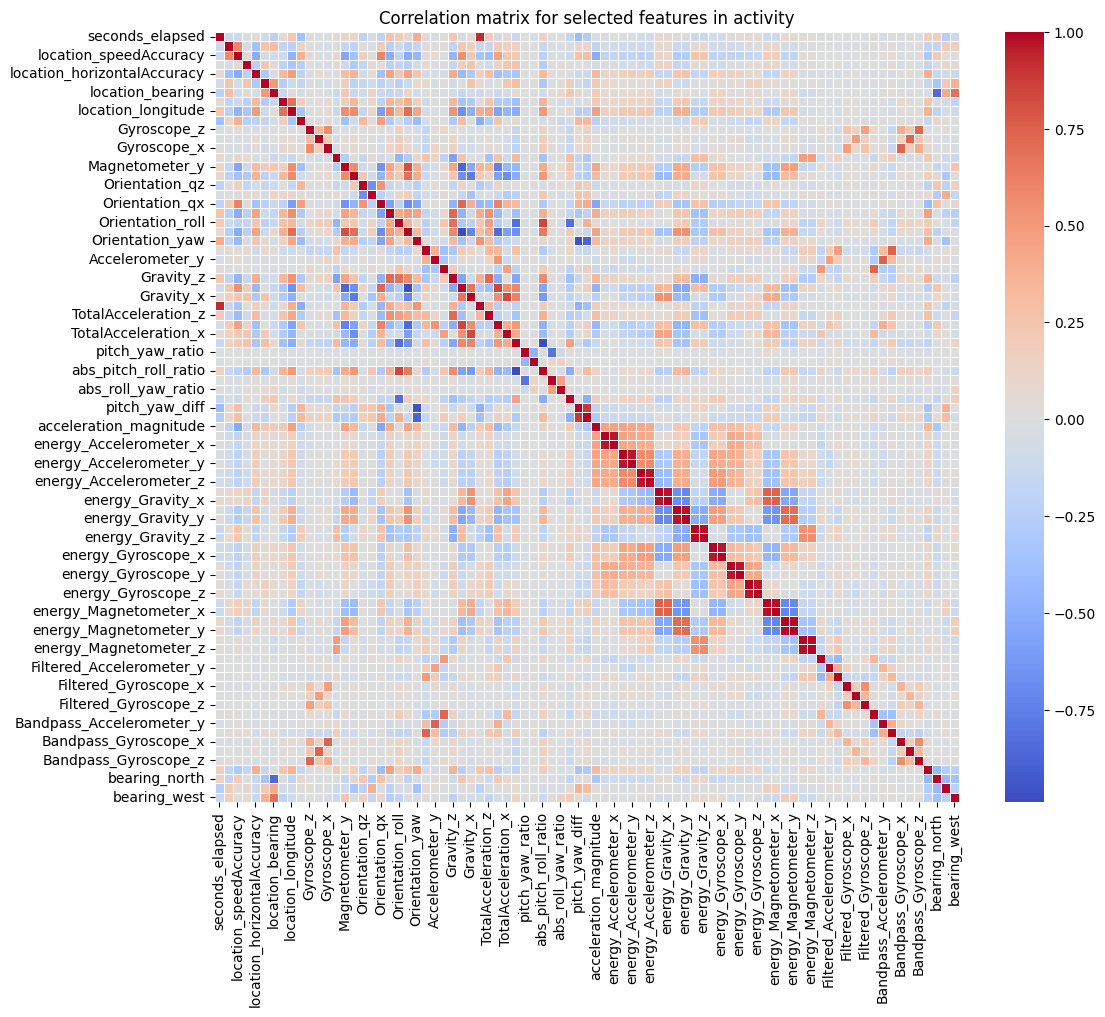

In [64]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Zakładając, że final_df jest już załadowany

# Lista kolumn do wykluczenia
excluded_keywords = ['std', 'mean', 'max', 'median', 'min','time','label']

# Filtrowanie kolumn
filtered_columns = [col for col in final_df.columns if not any(keyword in col for keyword in excluded_keywords)]

# Tworzenie nowej ramki danych z filtrowanymi kolumnami
filtered_df = final_df[filtered_columns].copy()

# Obliczanie macierzy korelacji dla filtrowanego DataFrame
correlation_matrix = filtered_df.corr()

# Rysowanie heatmapy macierzy korelacji bez wartości
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation matrix for selected features in activity')
plt.show()

In [65]:
# more accurate results

excluded_keywords = ['std', 'mean', 'max', 'median', 'min','time','label']

# Filtrowanie kolumn
filtered_columns = [col for col in final_df.columns if not any(keyword in col for keyword in excluded_keywords)]

# Tworzenie nowej ramki danych z filtrowanymi kolumnami
filtered_df = final_df[filtered_columns].copy()

# Obliczanie macierzy korelacji dla filtrowanego DataFrame
correlation_matrix = filtered_df.corr()

# Wybór cech do kombinacji na podstawie wysoko skorelowanych wartości
threshold = 0.85  # Ustalamy próg korelacji
high_correlation_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns 
                          if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold]

In [66]:
#we would like to know whether there is point to 
for pair in high_correlation_pairs:
    print(pair)

('seconds_elapsed', 'Pedometer_steps')
('location_bearing', 'bearing_north')
('Magnetometer_y', 'Gravity_y')
('Orientation_pitch', 'Gravity_y')
('Orientation_yaw', 'pitch_yaw_diff')
('Orientation_yaw', 'roll_yaw_diff')
('Gravity_y', 'Magnetometer_y')
('Gravity_y', 'Orientation_pitch')
('Gravity_y', 'TotalAcceleration_y')
('Pedometer_steps', 'seconds_elapsed')
('TotalAcceleration_y', 'Gravity_y')
('pitch_roll_ratio', 'abs_pitch_roll_ratio')
('abs_pitch_roll_ratio', 'pitch_roll_ratio')
('pitch_yaw_diff', 'Orientation_yaw')
('pitch_yaw_diff', 'roll_yaw_diff')
('roll_yaw_diff', 'Orientation_yaw')
('roll_yaw_diff', 'pitch_yaw_diff')
('rms_Accelerometer_x', 'energy_Accelerometer_x')
('energy_Accelerometer_x', 'rms_Accelerometer_x')
('rms_Accelerometer_y', 'energy_Accelerometer_y')
('energy_Accelerometer_y', 'rms_Accelerometer_y')
('rms_Accelerometer_z', 'energy_Accelerometer_z')
('energy_Accelerometer_z', 'rms_Accelerometer_z')
('rms_Gravity_x', 'energy_Gravity_x')
('energy_Gravity_x', 'rms_

In [67]:
#as we might see there might see there might be many features starting from `rms` or `energy` with high correlation, we will start from those features with
#high correlation that do not begin with energy or rms

filtered_pairs = set()
for x, y in high_correlation_pairs:
    if not (x.startswith('energy') or x.startswith('rms') or 
            y.startswith('energy') or y.startswith('rms')):
        # Sortowanie pary i dodanie do zestawu (set)
        filtered_pairs.add(tuple(sorted((x, y))))

# Wypisanie wyników
for pair in filtered_pairs:
    print(pair)

('abs_pitch_roll_ratio', 'pitch_roll_ratio')
('bearing_north', 'location_bearing')
('Pedometer_steps', 'seconds_elapsed')
('Orientation_yaw', 'pitch_yaw_diff')
('Gravity_y', 'Orientation_pitch')
('Gravity_y', 'Magnetometer_y')
('Gravity_y', 'TotalAcceleration_y')
('pitch_yaw_diff', 'roll_yaw_diff')
('Orientation_yaw', 'roll_yaw_diff')


columns to delte:<br>
1.Pedometer_steps- already created avg for them in time<br>
2.abs_pitch_roll_ratio- abs is less infrormative then normal value<br>
3.pitch_yaw_diff, roll_yaw_diif and Orientation_yaw- can be substituted with simple average of these three

In [68]:
final_df['combined_orientation'] = final_df[['Orientation_yaw', 'pitch_yaw_diff', 'roll_yaw_diff']].mean(axis=1)

In [69]:
final_df.drop(columns=['Pedometer_steps'], inplace=True)
final_df.drop(columns=['abs_pitch_roll_ratio'], inplace=True)
final_df.drop(columns=['Orientation_yaw', 'pitch_yaw_diff', 'roll_yaw_diff'], inplace=True)

In [70]:
# Lista par do filtrowania
energy_rms_pairs = []

# Przejście przez wszystkie pary
for x, y in high_correlation_pairs:
    if (x.startswith('energy') or x.startswith('rms')) or (y.startswith('energy') or y.startswith('rms')):
        energy_rms_pairs.append((x, y))

# Wypisanie wyników
for pair in energy_rms_pairs:
    print(pair)

('rms_Accelerometer_x', 'energy_Accelerometer_x')
('energy_Accelerometer_x', 'rms_Accelerometer_x')
('rms_Accelerometer_y', 'energy_Accelerometer_y')
('energy_Accelerometer_y', 'rms_Accelerometer_y')
('rms_Accelerometer_z', 'energy_Accelerometer_z')
('energy_Accelerometer_z', 'rms_Accelerometer_z')
('rms_Gravity_x', 'energy_Gravity_x')
('energy_Gravity_x', 'rms_Gravity_x')
('rms_Gravity_y', 'energy_Gravity_y')
('energy_Gravity_y', 'rms_Gravity_y')
('rms_Gravity_z', 'energy_Gravity_z')
('energy_Gravity_z', 'rms_Gravity_z')
('rms_Gyroscope_x', 'energy_Gyroscope_x')
('energy_Gyroscope_x', 'rms_Gyroscope_x')
('rms_Gyroscope_y', 'energy_Gyroscope_y')
('energy_Gyroscope_y', 'rms_Gyroscope_y')
('rms_Gyroscope_z', 'energy_Gyroscope_z')
('energy_Gyroscope_z', 'rms_Gyroscope_z')
('rms_Magnetometer_x', 'energy_Magnetometer_x')
('energy_Magnetometer_x', 'rms_Magnetometer_x')
('rms_Magnetometer_y', 'energy_Magnetometer_y')
('energy_Magnetometer_y', 'rms_Magnetometer_y')
('rms_Magnetometer_z', 'ener

In [71]:
#mayby let's delete all rms, it was not quite a good idea to add it

columns_to_drop = [col for col in final_df.columns if col.startswith('rms')]
final_df.drop(columns=columns_to_drop, inplace=True)

In [72]:

excluded_keywords = ['std', 'mean', 'max', 'median', 'min','time','label']

# Filtrowanie kolumn
filtered_columns = [col for col in final_df.columns if not any(keyword in col for keyword in excluded_keywords)]

# Tworzenie nowej ramki danych z filtrowanymi kolumnami
filtered_df = final_df[filtered_columns].copy()

# Obliczanie macierzy korelacji dla filtrowanego DataFrame
correlation_matrix = filtered_df.corr()

# Wybór cech do kombinacji na podstawie wysoko skorelowanych wartości
threshold = 0.85  # Ustalamy próg korelacji
high_correlation_pairs_new = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns 
                          if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold]

In [73]:
high_correlation_pairs_new

[('location_bearing', 'bearing_north'),
 ('Magnetometer_y', 'Gravity_y'),
 ('Orientation_pitch', 'Gravity_y'),
 ('Gravity_y', 'Magnetometer_y'),
 ('Gravity_y', 'Orientation_pitch'),
 ('Gravity_y', 'TotalAcceleration_y'),
 ('TotalAcceleration_y', 'Gravity_y'),
 ('bearing_north', 'location_bearing')]

-combinations (Gravity_y, Magnetometer_y), (Gravity_y, Orientation_pitch), (Gravity_y, TotalAcceleration_y) seem not trivial

In [74]:
final_df['Total_Motion_Intensity'] = (final_df['Gravity_y']**2 + final_df['Magnetometer_y']**2 + final_df['TotalAcceleration_y']**2)**0.5
final_df['Gravity_Magnetometer_y_interaction'] = final_df['Gravity_y'] * final_df['Magnetometer_y']
final_df['Gravity_Orientation_pitch_ratio'] = final_df['Gravity_y'] / (final_df['Orientation_pitch'] + 1e-6)

### Checking NaN and Inf in data frame

In [75]:
#We will not standarize the binary columns values, only we will standardize only the values ​​continuously from the columns

#we neeed to know which columns are the binary ones
def identify_binary_columns(df):
    binary_columns = []
    for col in df.columns:
        unique_values = df[col].unique()
        if set(unique_values) == {0, 1} or set(unique_values) == {0} or set(unique_values) == {1}:
            binary_columns.append(col)
    return binary_columns

# Identyfikacja kolumn binarnych
binary_columns = identify_binary_columns(final_df)

print("Kolumny binarne:", binary_columns)

Kolumny binarne: ['bearing_east', 'bearing_north', 'bearing_south', 'bearing_west']


In [76]:
#We have to get rid of column 'label', we simply check if there are any columns which contain text
def identify_text_columns(df):
    text_columns = []
    for col in df.columns:
        if df[col].dtype == 'object':
            text_columns.append(col)
    return text_columns

text_columns = identify_text_columns(final_df)

text_columns

['time', 'label']

### Before the standarization, replacing NaN and Inf values

In [77]:
#before PCA we have to get rid of fature 'time' and 'label'

if 'label' in final_df.columns:
    final_df.drop(columns=['label'], inplace=True)

if 'time' in final_df.columns:
    final_df.drop(columns=['time'], inplace=True)

In [78]:
#before doing standarization we have to know in which columns there appear NaN and Inf values

pd.options.mode.use_inf_as_na = True

# Sprawdzanie, które kolumny zawierają wartości NaN
nan_columns = final_df.columns[final_df.isna().any()].tolist()
print("Kolumny zawierające wartości NaN:", nan_columns)

Kolumny zawierające wartości NaN: []


In [79]:
nan_percentage_selected = final_df[nan_columns].isna().mean() * 100
nan_percentage_selected

Series([], dtype: float64)

In [80]:
#usuwamy kolumny, w ktorych braki przekraczaj 20 procent:

high_nan_columns = nan_percentage_selected[nan_percentage_selected > 20].index.tolist()

final_df.drop(columns=high_nan_columns, inplace=True)

#zastap w brakujacych kolumnach poprzez mediane z wartosci, ktora nie jest NaN

remaining_nan_columns = final_df.columns[final_df.isna().any()].tolist()
for column in remaining_nan_columns:
    median_value = final_df[column].median(skipna=True)  # Obliczanie mediany pomijając NaN
    final_df[column].fillna(median_value, inplace=True)  # Zastępowanie NaN medianą

### Standarization

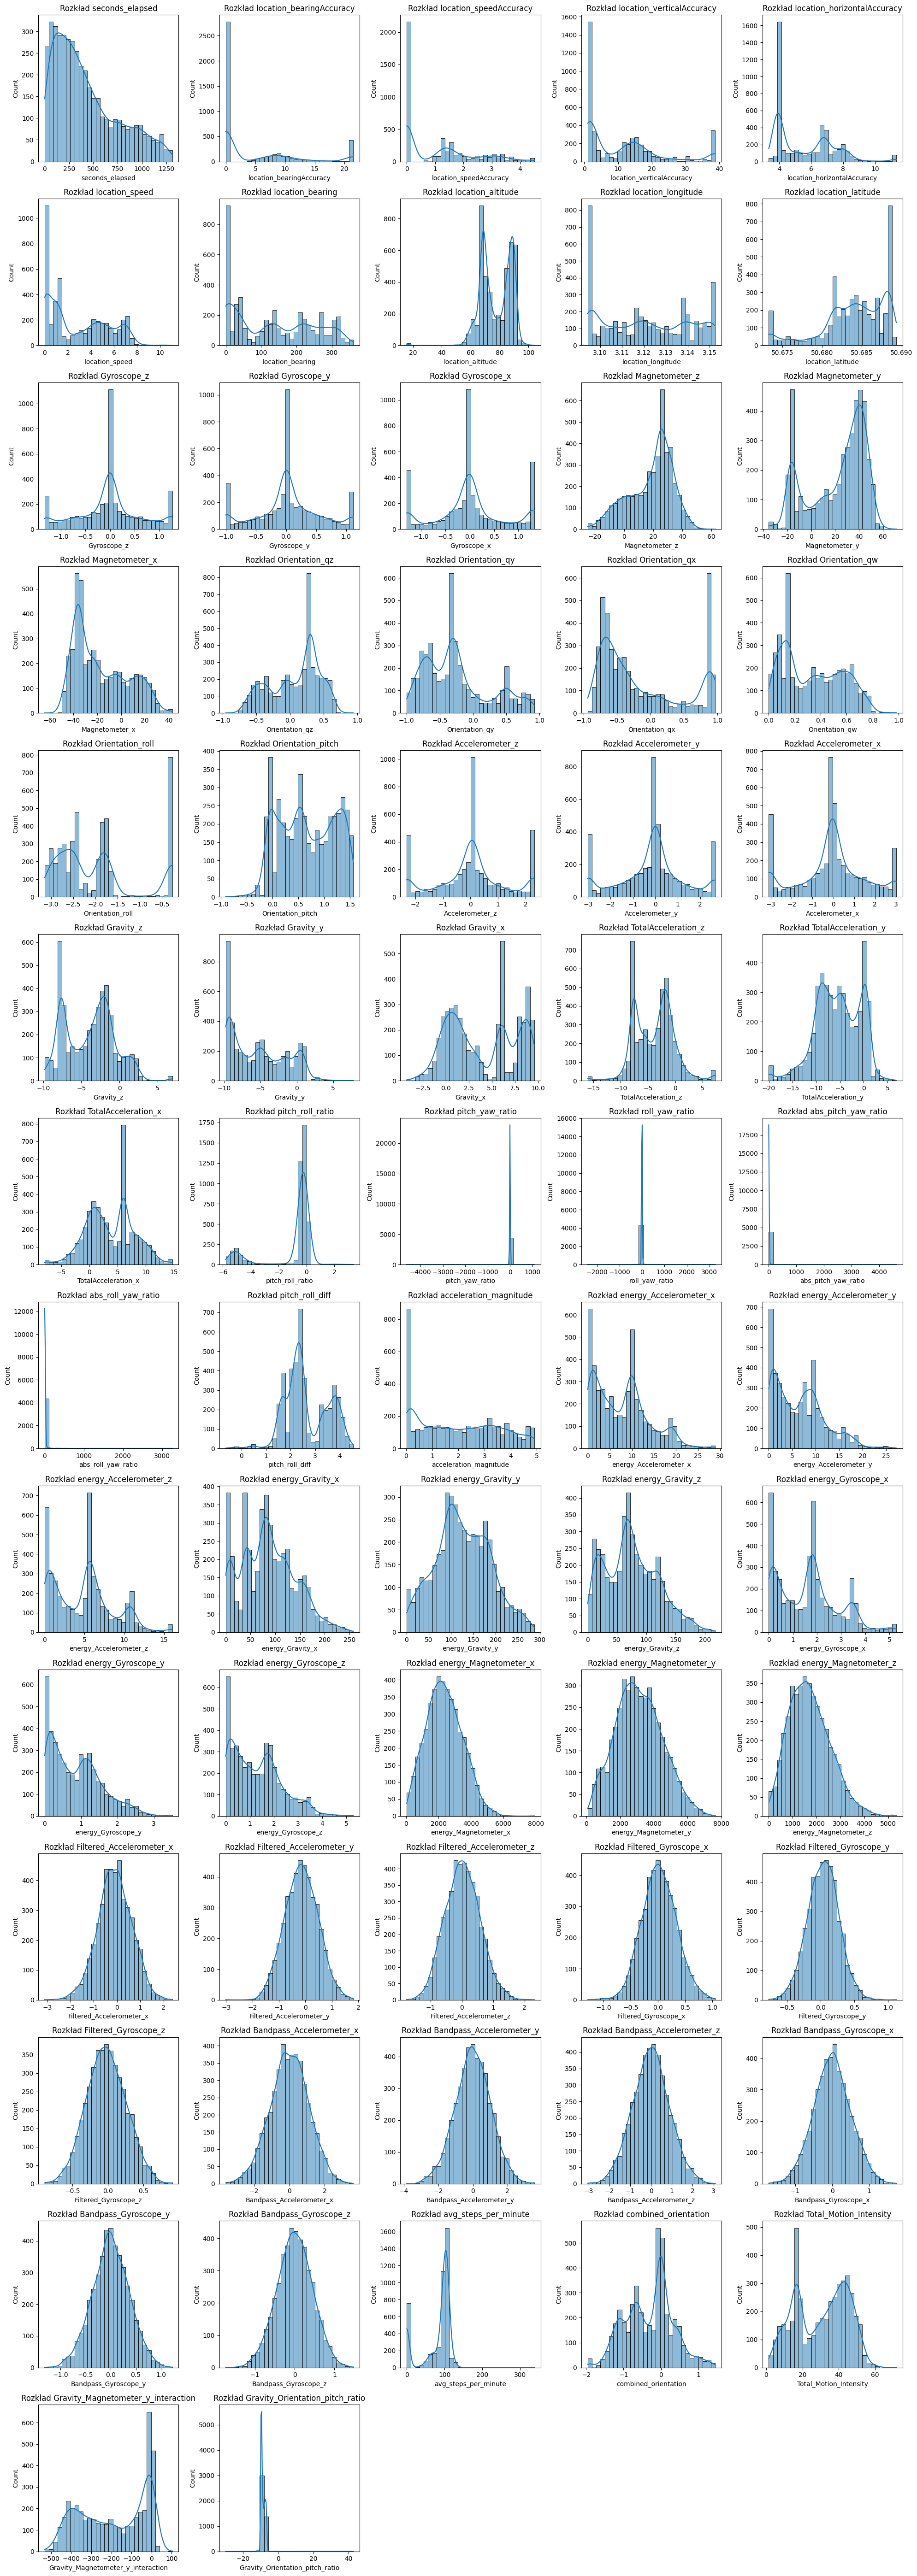

In [81]:
#before the standarization we have to how current distributions looks like

plot_distributions(final_df)

In [82]:
#another columns which might be point to get rid off

columns_to_drop = ['pitch_yaw_ratio', 'roll_yaw_ratio', 'abs_pitch_yaw_ratio', 'abs_roll_yaw_ratio']
final_df.drop(columns=columns_to_drop, inplace=True)

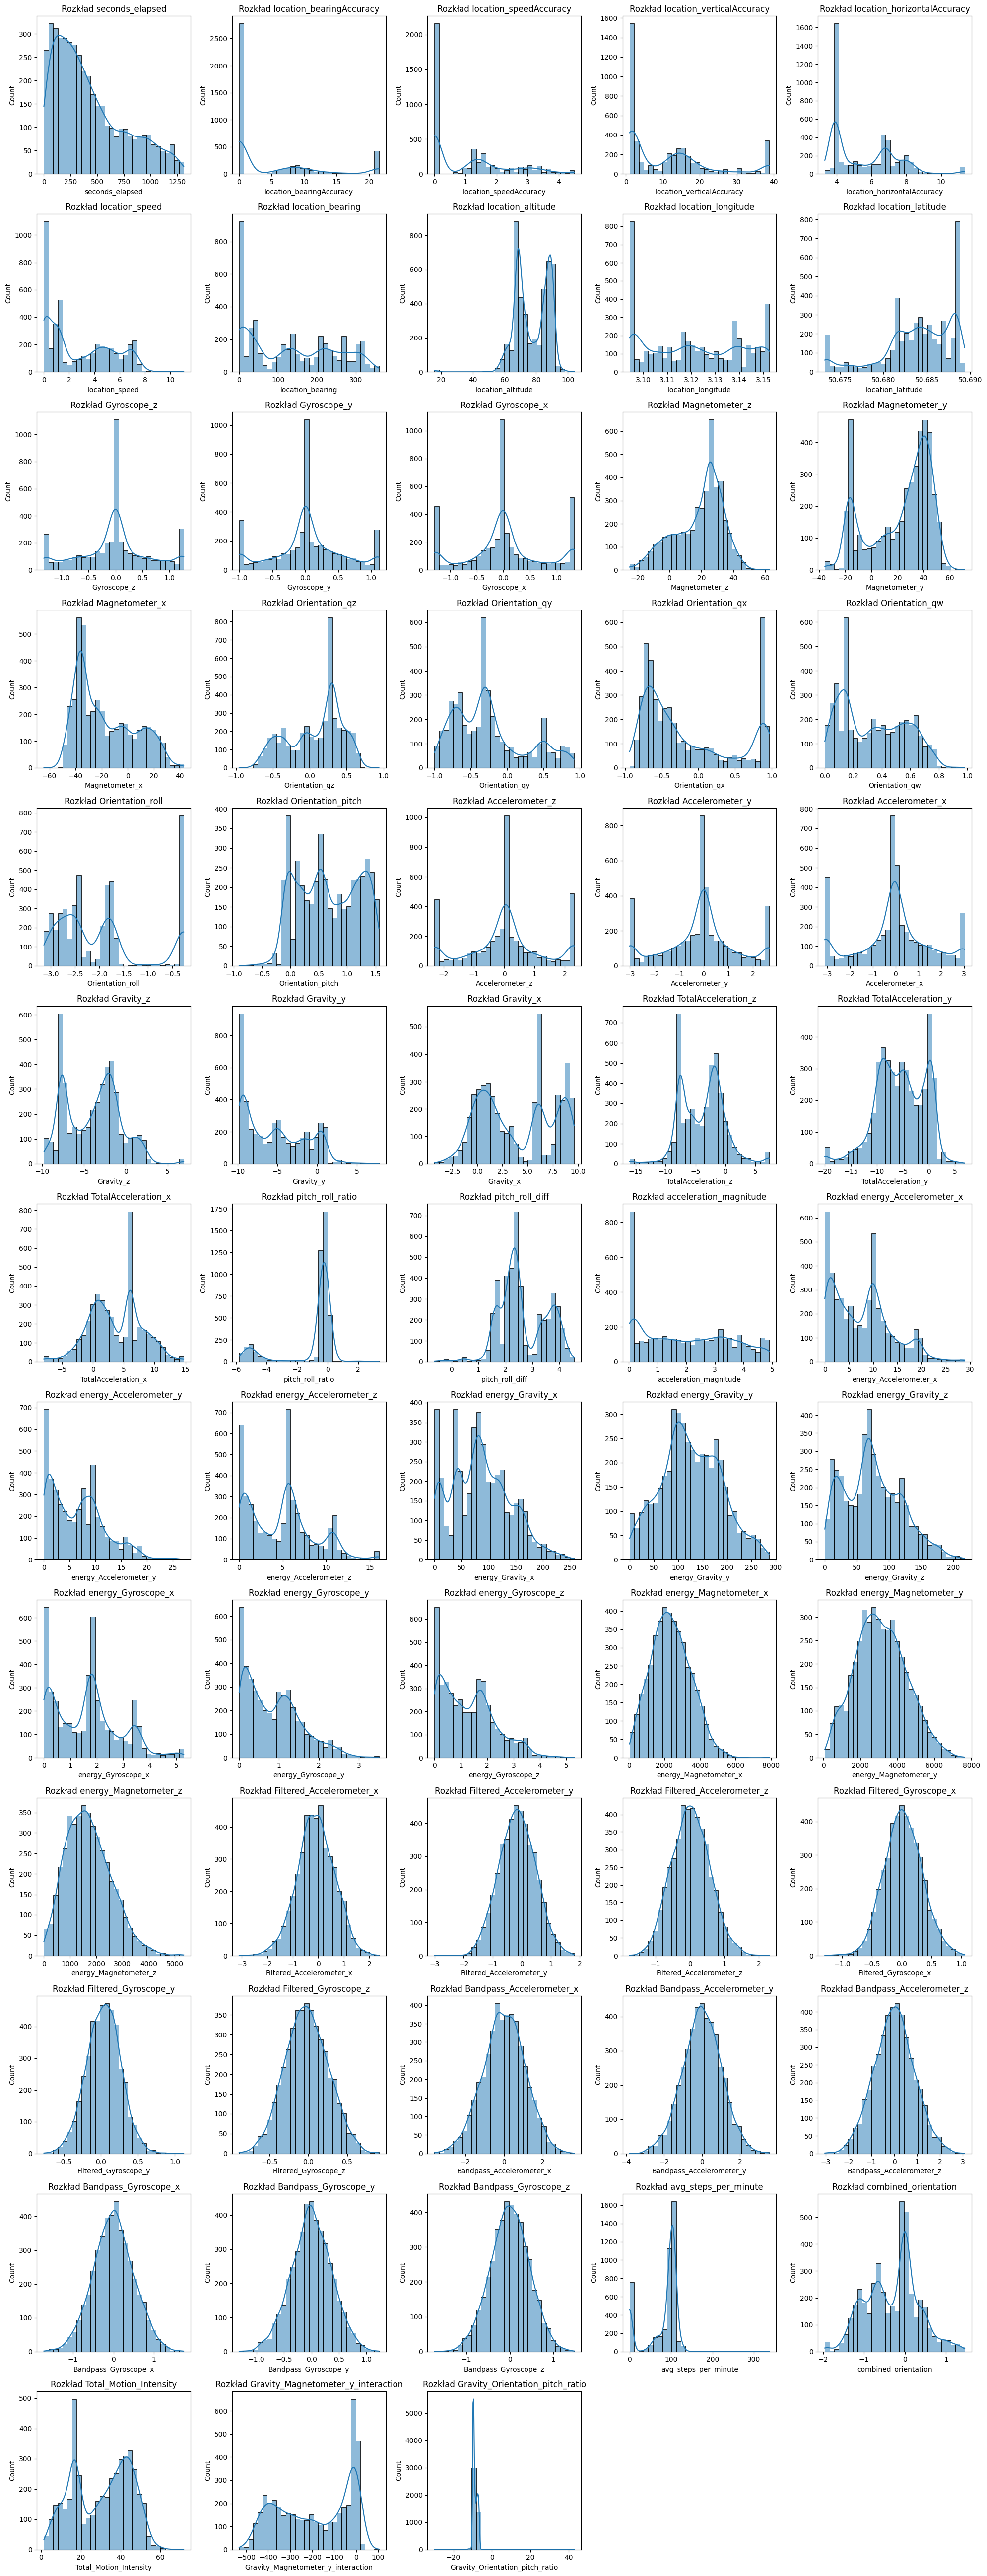

In [85]:
plot_distributions(final_df)

#### Saving data frame after FE (but without standarization) will be needed later for third step

In [86]:
final_df.to_csv("post_feature_engineering_data.csv", index=False)

### Logarithmization and Yeo-Johnson transformation

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# Załadowanie final_df (użyj rzeczywistych danych)
# final_df = pd.read_csv('path_to_your_data.csv')  # Jeśli dane są w pliku CSV

# Przyjmijmy, że final_df jest już załadowany
# Identyfikacja cech do transformacji
log_transform_features = [
    'seconds_elapsed', 
    'location_bearingAccuracy', 
    'location_speedAccuracy', 
    'location_verticalAccuracy', 
    'location_horizontalAccuracy', 
    'location_speed', 
    'location_bearing'
]

yeojohnson_transform_features = [
    'location_altitude', 'Orientation_pitch', 'Orientation_roll',
    'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z',
    'Magnetometer_x', 'Magnetometer_y', 'Magnetometer_z',
    'Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z',
    'TotalAcceleration_x', 'TotalAcceleration_y', 'TotalAcceleration_z',
    'energy_Accelerometer_x', 'energy_Accelerometer_y', 'energy_Accelerometer_z',
    'energy_Gyroscope_x', 'energy_Gyroscope_y', 'energy_Gyroscope_z',
    'energy_Magnetometer_x', 'energy_Magnetometer_y', 'energy_Magnetometer_z',
    'Filtered_Accelerometer_x', 'Filtered_Accelerometer_y', 'Filtered_Accelerometer_z',
    'Filtered_Gyroscope_x', 'Filtered_Gyroscope_y', 'Filtered_Gyroscope_z',
    'Bandpass_Gyroscope_x', 'Bandpass_Gyroscope_y', 'Bandpass_Gyroscope_z',
    'Bandpass_Accelerometer_x', 'Bandpass_Accelerometer_y', 'Bandpass_Accelerometer_z',
    'avg_steps_per_minute', 'combined_orientation', 'Total_Motion_Intensity',
    'Gravity_Magnetometer_y_interaction', 'Gravity_Orientation_pitch_ratio'
]
# Logarytmowanie cech
for col in log_transform_features:
    final_df[col] = np.log1p(final_df[col])

# Transformacja Yeo-Johnsona dla cech nieprzypominających rozkładu normalnego
pt_yeojohnson = PowerTransformer(method='yeo-johnson')
final_df[yeojohnson_transform_features] = pt_yeojohnson.fit_transform(final_df[yeojohnson_transform_features])

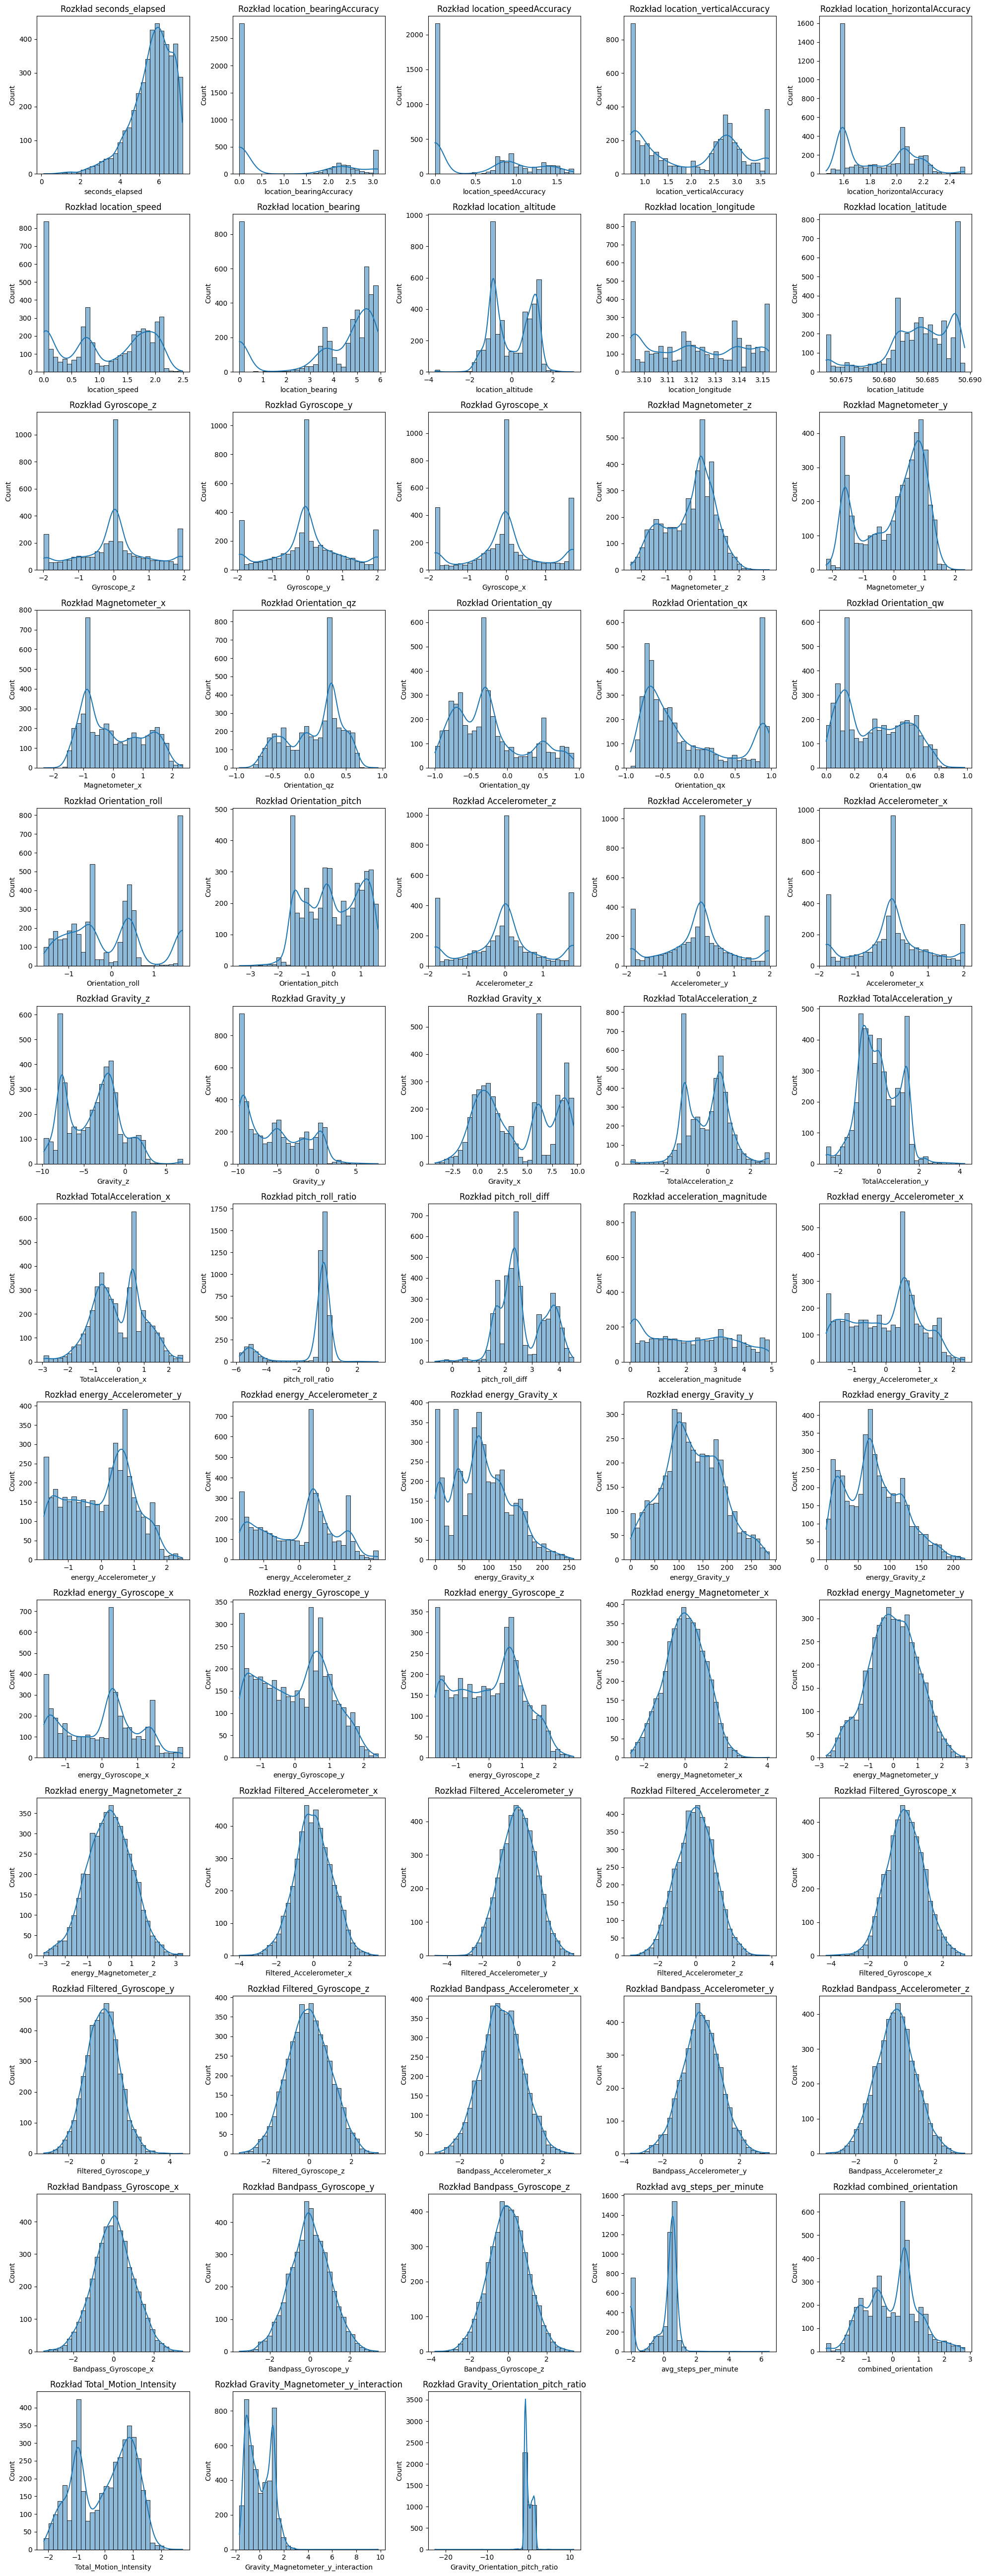

In [35]:
plot_distributions(final_df)

### Standarization

In [36]:
#Standarization
columns_to_scale = [col for col in final_df.columns if col not in binary_columns and col != 'time']

final_df_copy = final_df.copy() #Will be needed for last section of this step

scaler = StandardScaler()
final_df[columns_to_scale] = scaler.fit_transform(final_df[columns_to_scale])

# Dimension reduction

### PCA

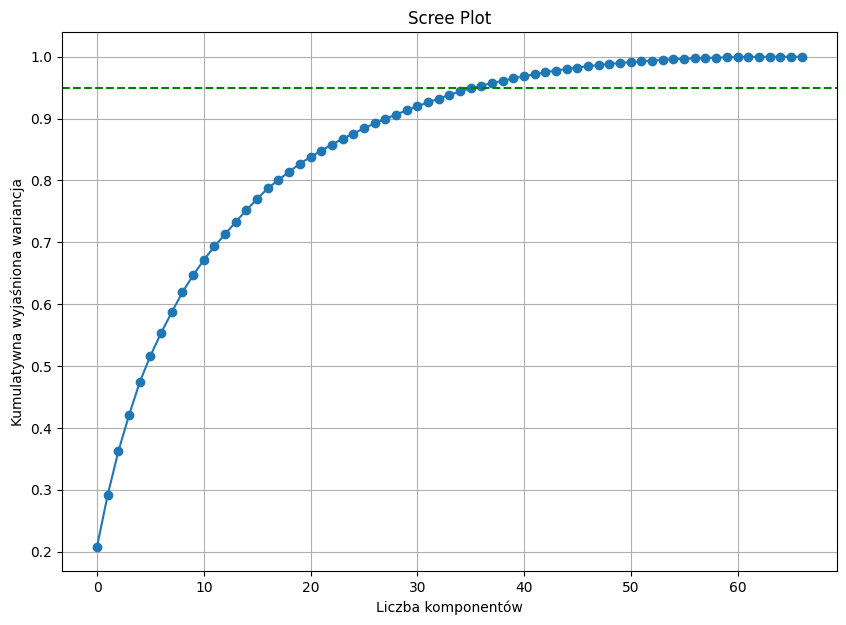

Komponent 1: 0.2082 wyjaśnionej wariancji
Komponent 2: 0.2918 wyjaśnionej wariancji
Komponent 3: 0.3623 wyjaśnionej wariancji
Komponent 4: 0.4207 wyjaśnionej wariancji
Komponent 5: 0.4740 wyjaśnionej wariancji
Komponent 6: 0.5166 wyjaśnionej wariancji
Komponent 7: 0.5534 wyjaśnionej wariancji
Komponent 8: 0.5871 wyjaśnionej wariancji
Komponent 9: 0.6193 wyjaśnionej wariancji
Komponent 10: 0.6466 wyjaśnionej wariancji
Komponent 11: 0.6715 wyjaśnionej wariancji
Komponent 12: 0.6934 wyjaśnionej wariancji
Komponent 13: 0.7133 wyjaśnionej wariancji
Komponent 14: 0.7331 wyjaśnionej wariancji
Komponent 15: 0.7521 wyjaśnionej wariancji
Komponent 16: 0.7701 wyjaśnionej wariancji
Komponent 17: 0.7874 wyjaśnionej wariancji
Komponent 18: 0.8008 wyjaśnionej wariancji
Komponent 19: 0.8142 wyjaśnionej wariancji
Komponent 20: 0.8269 wyjaśnionej wariancji
Komponent 21: 0.8381 wyjaśnionej wariancji
Komponent 22: 0.8481 wyjaśnionej wariancji
Komponent 23: 0.8579 wyjaśnionej wariancji
Komponent 24: 0.8673

In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Zakładamy, że final_df jest już załadowany i przetworzony, a final_df_scaled jest standaryzowanym DataFrame

# Oblicz PCA na pełnym zestawie danych
pca = PCA().fit(final_df)

# Wykres "scree plot"
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(y=0.95, color='g', linestyle='--') 
plt.xlabel('Liczba komponentów')
plt.ylabel('Kumulatywna wyjaśniona wariancja')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Wydrukuj wyjaśnioną wariancję dla poszczególnych komponentów
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(explained_variance):
    print(f"Komponent {i+1}: {var:.4f} wyjaśnionej wariancji")

In [38]:
n_components= 35

pca = PCA(n_components=n_components)
final_df_pca = pca.fit_transform(final_df)

In [39]:
# Konwersja wyniku z powrotem do DataFrame
pca_columns = [f'PCA{i+1}' for i in range(n_components)]
final_df_pca = pd.DataFrame(final_df_pca, columns=pca_columns)

### Deciding about right amount of clusters for PCA

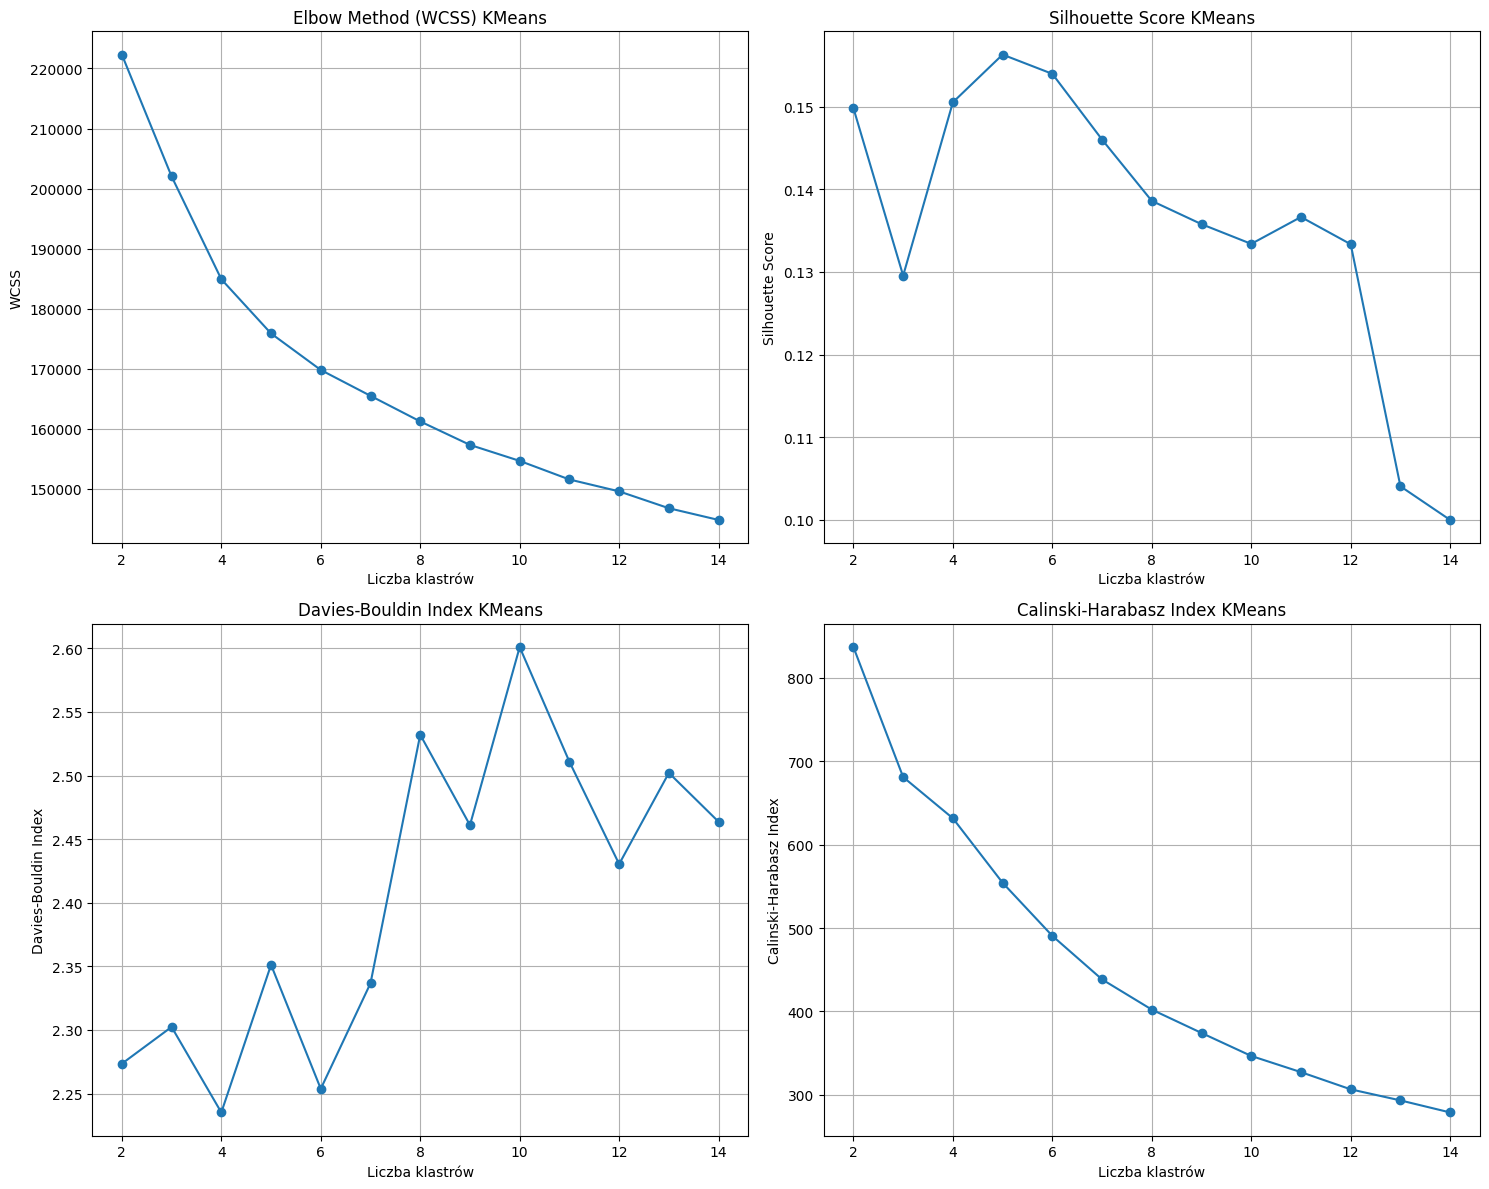

In [40]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Listy do przechowywania wyników
wcss = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Obliczanie metryk dla różnych liczby klastrów
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    labels = kmeans.fit_predict(final_df_pca)
    
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(final_df_pca, labels))
    davies_bouldin_scores.append(davies_bouldin_score(final_df_pca, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(final_df_pca, labels))

# Wykresy wszystkich metryk
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# WCSS
axs[0, 0].plot(range(2, 15), wcss, marker='o')
axs[0, 0].set_xlabel('Liczba klastrów')
axs[0, 0].set_ylabel('WCSS')
axs[0, 0].set_title('Elbow Method (WCSS) KMeans')
axs[0, 0].grid(True)

# Silhouette Score
axs[0, 1].plot(range(2, 15), silhouette_scores, marker='o')
axs[0, 1].set_xlabel('Liczba klastrów')
axs[0, 1].set_ylabel('Silhouette Score')
axs[0, 1].set_title('Silhouette Score KMeans')
axs[0, 1].grid(True)

# Davies-Bouldin Index
axs[1, 0].plot(range(2, 15), davies_bouldin_scores, marker='o')
axs[1, 0].set_xlabel('Liczba klastrów')
axs[1, 0].set_ylabel('Davies-Bouldin Index')
axs[1, 0].set_title('Davies-Bouldin Index KMeans')
axs[1, 0].grid(True)

# Calinski-Harabasz Index
axs[1, 1].plot(range(2, 15), calinski_harabasz_scores, marker='o')
axs[1, 1].set_xlabel('Liczba klastrów')
axs[1, 1].set_ylabel('Calinski-Harabasz Index')
axs[1, 1].set_title('Calinski-Harabasz Index KMeans')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

Conclusions:<br>

Elbow Method: 4 clusters<br>
Silhouette Score: 5 clusters<br>
Davies-Bouldin: 4 clusters<br>
Calinski-Harabasz: 2 clusters<br>

In [41]:
final_df_pca.head()

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -2.031624  3.357168  0.150760  1.065874  0.216760  3.887816 -1.254363   
1 -2.222250  0.589737 -0.973876 -4.000132 -1.198749  2.272649 -1.838029   
2  0.691395  0.098410  2.474338 -1.897829  0.813089 -1.802883 -2.586154   
3 -1.485782  1.142073 -0.771794 -2.419134 -0.407013  1.580835 -1.308217   
4  1.785669 -2.067296  3.725402  2.115295 -2.258998  0.720995  2.206863   

       PCA8      PCA9     PCA10  ...     PCA26     PCA27     PCA28     PCA29  \
0  0.403663 -0.555503  1.684975  ... -1.057348 -1.197244 -1.022711 -1.117518   
1  1.302578 -0.933192  1.933698  ...  0.212604 -0.163455 -0.264913 -0.171380   
2 -0.722931 -0.027754  0.270832  ...  0.457397 -0.737501 -0.999677 -0.948532   
3  0.015391 -0.652599  0.250785  ...  1.757727  0.253110 -0.023308  0.586304   
4 -0.749762 -0.806237  0.351573  ...  0.831500  0.166412 -0.311226 -0.237242   

      PCA30     PCA31     PCA32     PCA33     PCA34     PCA35  
0  0.277496  0.113247 -0.412210 -0.583145  0.856104 -0.520501  
1  1.528970  0.259464 -0.108390 -0.810269  0.027038 -0.618861  
2  0.166085 -0.022932 -0.143236 -1.441603  0.406546  0.076134  
3  0.929649  0.435283  0.024140 -0.878332  0.203665 -0.368386  
4  0.720816  0.719357  0.329734 -0.133657  0.288793 -0.084867  

[5 rows x 35 columns]

In [42]:
#creating needed data frame
pca_df = pd.DataFrame(final_df_pca, columns=[f'PCA{i+1}' for i in range(35)])

In [43]:
# Klasteryzacja KMeans dla różnych liczby klastrów
cluster_counts = {
    'elbow_method_kmeans': 4,
    'silhouette_score_kmeans': 5,
    'davies_bouldin_kmeans': 4,
    'calinski_harabasz_kmeans': 2
}

# Tworzenie kolumn z klasteryzacją dla każdej metryki
for method, n_clusters in cluster_counts.items():
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(final_df_pca)
    pca_df[f'clusters_{method}'] = clusters

### Function for assessing clustering

In [44]:
# Funkcja do oceny klasteryzacji
def evaluate_clustering(X, labels):
    scores = {
        'Silhouette Score': silhouette_score(X, labels),
        'Davies-Bouldin Index': davies_bouldin_score(X, labels),
        'Calinski-Harabasz Index': calinski_harabasz_score(X, labels)
    }
    return scores

In [45]:
# Ocena wyników klasteryzacji dla każdej metryki simple KMeans
results = []

for method in cluster_counts.keys():
    clusters = pca_df[f'clusters_{method}']
    scores = evaluate_clustering(final_df_pca, clusters)
    results.append((method, scores))

# Wyświetlenie wyników
results_df = pd.DataFrame(results, columns=['Method', 'Scores'])
results_df['Silhouette Score'] = results_df['Scores'].apply(lambda x: x['Silhouette Score'])
results_df['Davies-Bouldin Index'] = results_df['Scores'].apply(lambda x: x['Davies-Bouldin Index'])
results_df['Calinski-Harabasz Index'] = results_df['Scores'].apply(lambda x: x['Calinski-Harabasz Index'])
results_df = results_df.drop(columns=['Scores'])

results_df

Method  Silhouette Score  Davies-Bouldin Index  \
0       elbow_method_kmeans          0.150514              2.235159   
1   silhouette_score_kmeans          0.156283              2.351185   
2     davies_bouldin_kmeans          0.150514              2.235159   
3  calinski_harabasz_kmeans          0.149806              2.273474   

   Calinski-Harabasz Index  
0               631.460384  
1               554.198151  
2               631.460384  
3               836.609190

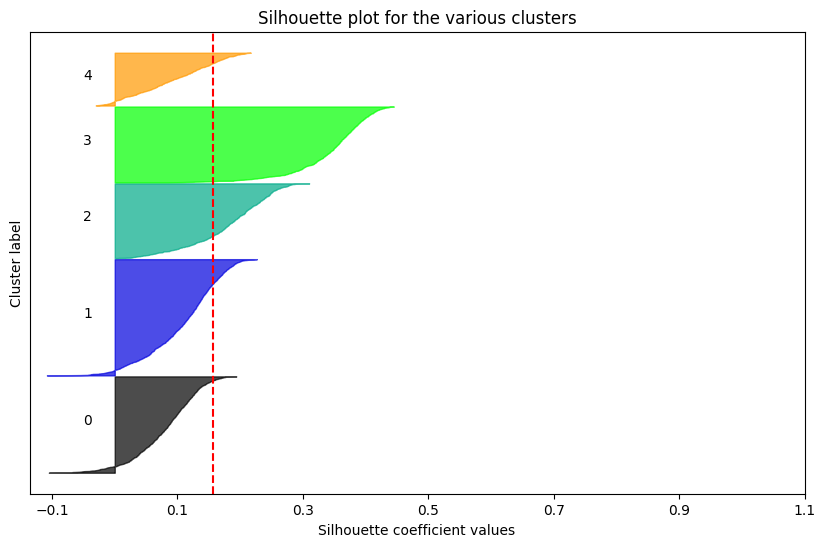

In [48]:
# Dane wejściowe
X = final_df_pca
labels = pca_df['clusters_silhouette_score_kmeans']

# Obliczenie wartości sylwetki dla każdego punktu
silhouette_vals = silhouette_samples(X, labels)

# Ogólny wynik Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Wizualizacja wykresu sylwetek
fig, ax = plt.subplots(figsize=(10, 6))

# Początek osi y
y_lower = 10
for i in range(cluster_counts['silhouette_score_kmeans']):
    ith_cluster_silhouette_values = silhouette_vals[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / cluster_counts['silhouette_score_kmeans'])
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax.set_title("Silhouette plot for the various clusters")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))

### PCA with 2 components for visualization

In [187]:
n_components= 2

pca = PCA(n_components=n_components)
final_df_pca_2_components = pca.fit_transform(final_df)

# Konwersja wyniku z powrotem do DataFrame
pca_columns = [f'PCA{i+1}' for i in range(n_components)]
final_df_pca_2_components = pd.DataFrame(final_df_pca_2_components, columns=pca_columns)

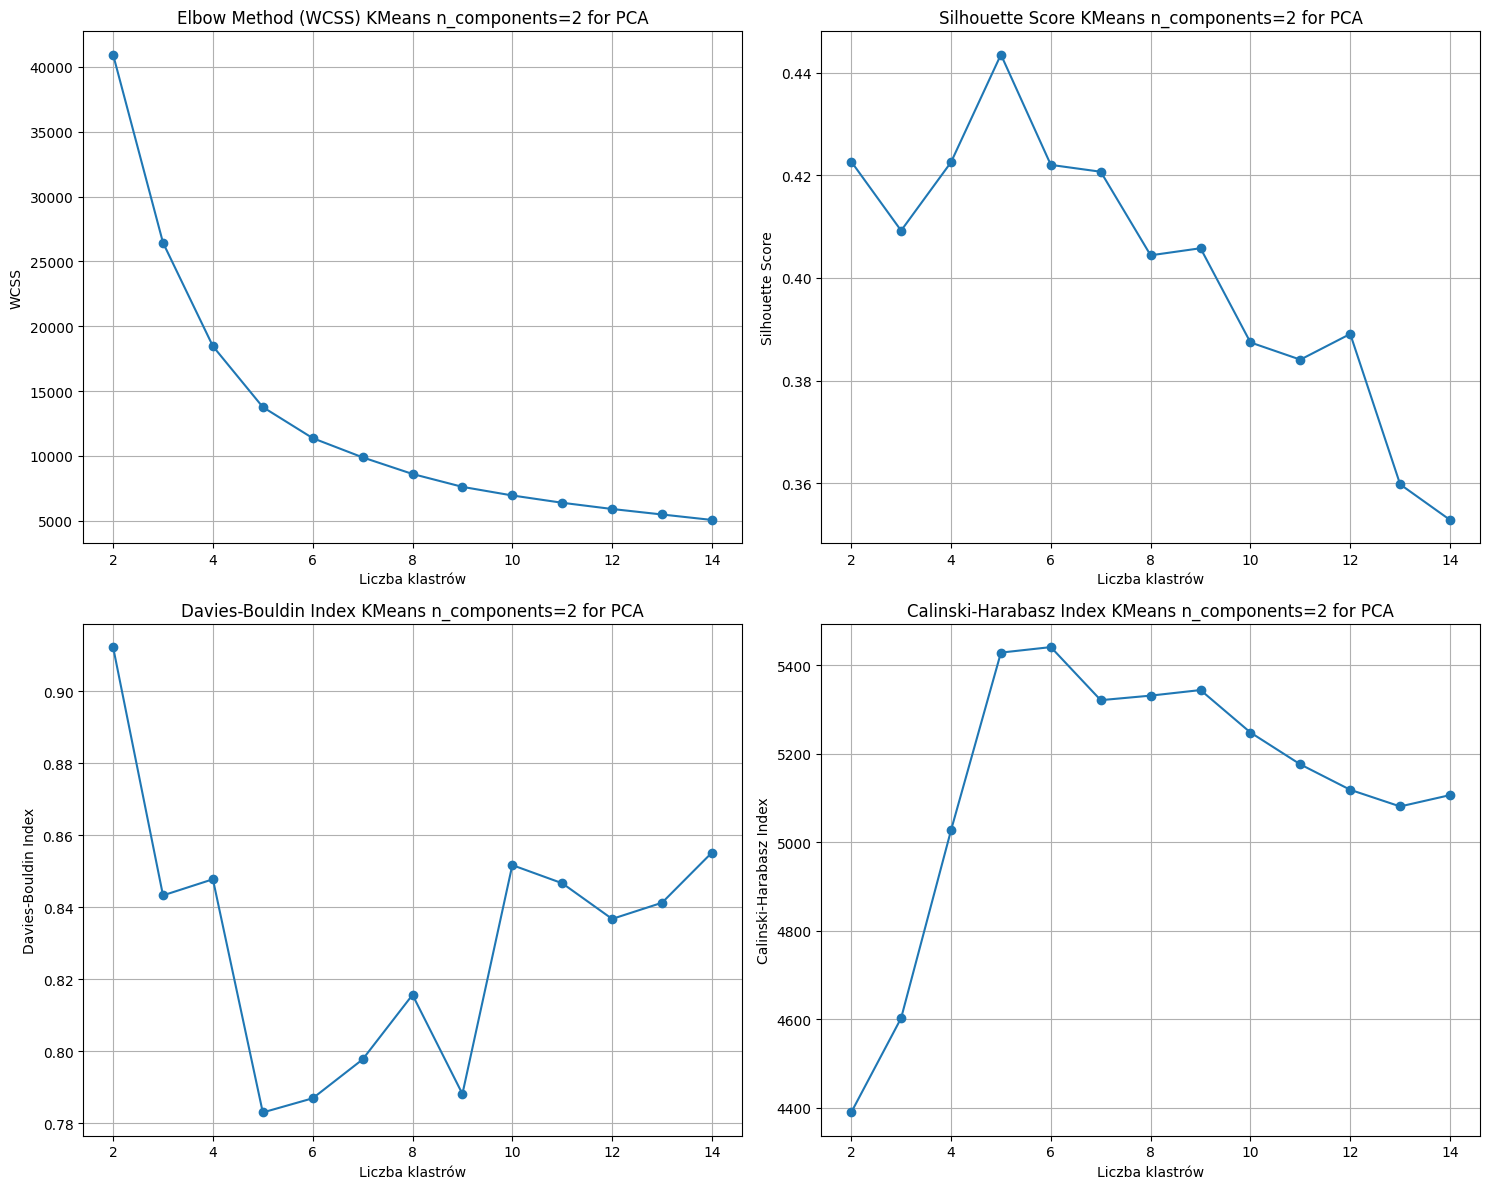

In [188]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Listy do przechowywania wyników
wcss = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Obliczanie metryk dla różnych liczby klastrów
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    labels = kmeans.fit_predict(final_df_pca_2_components)
    
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(final_df_pca_2_components, labels))
    davies_bouldin_scores.append(davies_bouldin_score(final_df_pca_2_components, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(final_df_pca_2_components, labels))

# Wykresy wszystkich metryk
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# WCSS
axs[0, 0].plot(range(2, 15), wcss, marker='o')
axs[0, 0].set_xlabel('Liczba klastrów')
axs[0, 0].set_ylabel('WCSS')
axs[0, 0].set_title('Elbow Method (WCSS) KMeans n_components=2 for PCA')
axs[0, 0].grid(True)

# Silhouette Score
axs[0, 1].plot(range(2, 15), silhouette_scores, marker='o')
axs[0, 1].set_xlabel('Liczba klastrów')
axs[0, 1].set_ylabel('Silhouette Score')
axs[0, 1].set_title('Silhouette Score KMeans n_components=2 for PCA')
axs[0, 1].grid(True)

# Davies-Bouldin Index
axs[1, 0].plot(range(2, 15), davies_bouldin_scores, marker='o')
axs[1, 0].set_xlabel('Liczba klastrów')
axs[1, 0].set_ylabel('Davies-Bouldin Index')
axs[1, 0].set_title('Davies-Bouldin Index KMeans n_components=2 for PCA')
axs[1, 0].grid(True)

# Calinski-Harabasz Index
axs[1, 1].plot(range(2, 15), calinski_harabasz_scores, marker='o')
axs[1, 1].set_xlabel('Liczba klastrów')
axs[1, 1].set_ylabel('Calinski-Harabasz Index')
axs[1, 1].set_title('Calinski-Harabasz Index KMeans n_components=2 for PCA')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [189]:
#creating needed data frame
pca_df_2_components = pd.DataFrame(final_df_pca_2_components, columns=[f'PCA{i+1}' for i in range(2)])

# Klasteryzacja KMeans dla różnych liczby klastrów
cluster_counts = {
    'elbow_method_kmeans': 4,
    'silhouette_score_kmeans': 5,
    'davies_bouldin_kmeans': 5,
    'calinski_harabasz_kmeans': 6
}

# Tworzenie kolumn z klasteryzacją dla każdej metryki
for method, n_clusters in cluster_counts.items():
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(final_df_pca_2_components)
    pca_df_2_components[f'clusters_{method}'] = clusters

# Ocena wyników klasteryzacji dla każdej metryki simple KMeans
results = []

for method in cluster_counts.keys():
    clusters = pca_df_2_components[f'clusters_{method}']
    scores = evaluate_clustering(final_df_pca_2_components, clusters)
    results.append((method, scores))

# Wyświetlenie wyników
results_df = pd.DataFrame(results, columns=['Method', 'Scores'])
results_df['Silhouette Score'] = results_df['Scores'].apply(lambda x: x['Silhouette Score'])
results_df['Davies-Bouldin Index'] = results_df['Scores'].apply(lambda x: x['Davies-Bouldin Index'])
results_df['Calinski-Harabasz Index'] = results_df['Scores'].apply(lambda x: x['Calinski-Harabasz Index'])
results_df = results_df.drop(columns=['Scores'])

results_df

Method  Silhouette Score  Davies-Bouldin Index  \
0       elbow_method_kmeans          0.422565              0.847753   
1   silhouette_score_kmeans          0.443544              0.782967   
2     davies_bouldin_kmeans          0.443544              0.782967   
3  calinski_harabasz_kmeans          0.422046              0.786903   

   Calinski-Harabasz Index  
0              5026.898733  
1              5428.273825  
2              5428.273825  
3              5440.701800

#### Quick visualization of PCA for best results considering only two dimensions

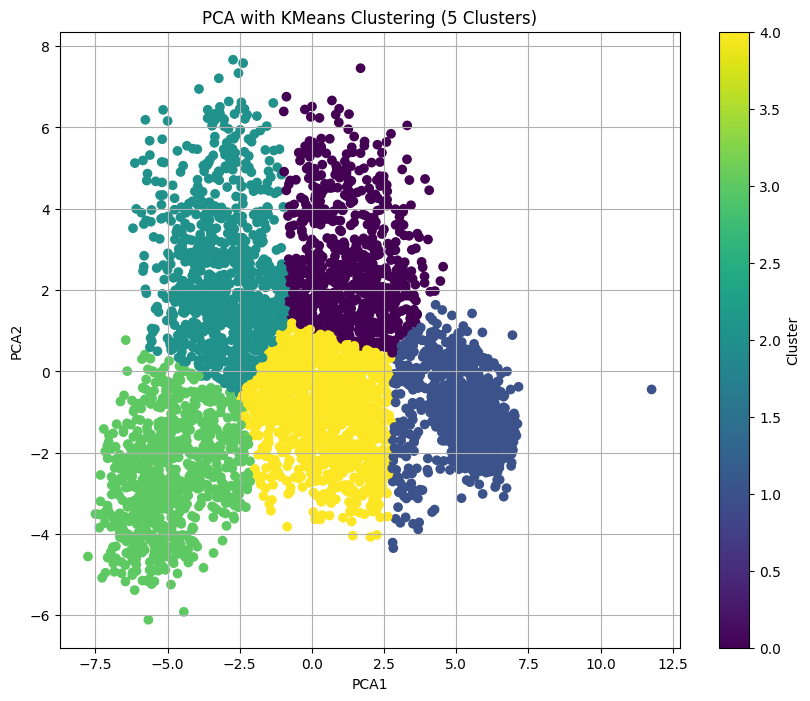

In [190]:
# Klasteryzacja KMeans dla 5 klastrów
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
clusters = kmeans.fit_predict(final_df_pca_2_components)

# Dodanie klastrów do DataFrame
final_df_pca_2_components['Cluster'] = clusters

# Wizualizacja PCA z oznaczeniami kolorystycznymi związanymi z klastrem
plt.figure(figsize=(10, 8))
plt.scatter(final_df_pca_2_components['PCA1'], final_df_pca_2_components['PCA2'], c=final_df_pca_2_components['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA with KMeans Clustering (5 Clusters)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

-encouraged by results for PCA n_components=2 we try different algorithms

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MiniBatchKMeans, MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Załaduj dane (final_df) i przeprowadź PCA
n_components = 2
pca = PCA(n_components=n_components)
final_df_pca_2_components = pca.fit_transform(final_df)

# Konwersja wyniku z powrotem do DataFrame
pca_columns = [f'PCA{i+1}' for i in range(n_components)]
pca_df_2_components = pd.DataFrame(final_df_pca_2_components, columns=pca_columns)

# Lista algorytmów klasteryzacji
cluster_algorithms = {
    'KMedoids': KMedoids,
    'MiniBatchKMeans': MiniBatchKMeans,
    'MeanShift': MeanShift,
    'SpectralClustering': SpectralClustering,
    'AgglomerativeClustering': AgglomerativeClustering,
    'DBSCAN': DBSCAN,
    'GaussianMixture': GaussianMixture
}

# Funkcja oceniająca wyniki klasteryzacji
def evaluate_clustering(data, labels):
    scores = {
        'Silhouette Score': silhouette_score(data, labels),
        'Davies-Bouldin Index': davies_bouldin_score(data, labels),
        'Calinski-Harabasz Index': calinski_harabasz_score(data, labels)
    }
    return scores

# Listy do przechowywania wyników
results = []

# Klasteryzacja i ocena wyników dla każdego algorytmu
for name, algorithm in cluster_algorithms.items():
    best_scores = {
        'Silhouette Score': -1,
        'Davies-Bouldin Index': np.inf,
        'Calinski-Harabasz Index': -1
    }
    best_n_clusters = {
        'Silhouette Score': None,
        'Davies-Bouldin Index': None,
        'Calinski-Harabasz Index': None
    }
    
    for n_clusters in range(2, 15):
        if name == 'MeanShift' or name == 'DBSCAN':
            # Te algorytmy nie wymagają liczby klastrów
            clustering = algorithm()
        else:
            if name == 'GaussianMixture':
                clustering = algorithm(n_components=n_clusters, random_state=42)
            elif name == 'AgglomerativeClustering' or name == 'SpectralClustering':
                clustering = algorithm(n_clusters=n_clusters)
            else:
                clustering = algorithm(n_clusters=n_clusters, random_state=42)
        
        if hasattr(clustering, 'fit_predict'):
            labels = clustering.fit_predict(final_df_pca_2_components)
        else:
            clustering.fit(final_df_pca_2_components)
            labels = clustering.predict(final_df_pca_2_components)
        
        scores = evaluate_clustering(final_df_pca_2_components, labels)
        
        # Aktualizacja najlepszych wyników
        if scores['Silhouette Score'] > best_scores['Silhouette Score']:
            best_scores['Silhouette Score'] = scores['Silhouette Score']
            best_n_clusters['Silhouette Score'] = n_clusters
        
        if scores['Davies-Bouldin Index'] < best_scores['Davies-Bouldin Index']:
            best_scores['Davies-Bouldin Index'] = scores['Davies-Bouldin Index']
            best_n_clusters['Davies-Bouldin Index'] = n_clusters
        
        if scores['Calinski-Harabasz Index'] > best_scores['Calinski-Harabasz Index']:
            best_scores['Calinski-Harabasz Index'] = scores['Calinski-Harabasz Index']
            best_n_clusters['Calinski-Harabasz Index'] = n_clusters
    
    results.append((name, best_n_clusters, best_scores))

# Konwersja wyników do DataFrame
results_df = pd.DataFrame(results, columns=['Algorithm', 'Best N Clusters', 'Best Scores'])
results_df['Silhouette Score'] = results_df['Best Scores'].apply(lambda x: x['Silhouette Score'])
results_df['Davies-Bouldin Index'] = results_df['Best Scores'].apply(lambda x: x['Davies-Bouldin Index'])
results_df['Calinski-Harabasz Index'] = results_df['Best Scores'].apply(lambda x: x['Calinski-Harabasz Index'])
results_df = results_df.drop(columns=['Best Scores'])

#dziala poprawnie trzeba poczekac po prostu pare/parenascie minut

KeyboardInterrupt: 

In [160]:
results_df

Algorithm                                    Best N Clusters  \
0                 KMedoids  {'Silhouette Score': 5, 'Davies-Bouldin Index'...   
1          MiniBatchKMeans  {'Silhouette Score': 6, 'Davies-Bouldin Index'...   
2                MeanShift  {'Silhouette Score': 2, 'Davies-Bouldin Index'...   
3       SpectralClustering  {'Silhouette Score': 7, 'Davies-Bouldin Index'...   
4  AgglomerativeClustering  {'Silhouette Score': 2, 'Davies-Bouldin Index'...   
5                   DBSCAN  {'Silhouette Score': 2, 'Davies-Bouldin Index'...   
6          GaussianMixture  {'Silhouette Score': 5, 'Davies-Bouldin Index'...   

   Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Index  
0          0.442379              0.772146              5402.707625  
1          0.423364              0.787689              5397.112325  
2          0.233240              0.631961               650.527630  
3          0.400781              0.661456              4701.435292  
4          0.409641              0.835337              4525.477504  
5          0.296019              3.180938                21.057043  
6          0.419696              0.684837              5135.922809

### Now we try with variance explainability to 0.85 so for n_components= 21

In [163]:
n_components= 21

pca = PCA(n_components=n_components)
final_df_pca_21_components = pca.fit_transform(final_df)

# Konwersja wyniku z powrotem do DataFrame
pca_columns = [f'PCA{i+1}' for i in range(n_components)]
final_df_pca_21_components = pd.DataFrame(final_df_pca_21_components, columns=pca_columns)

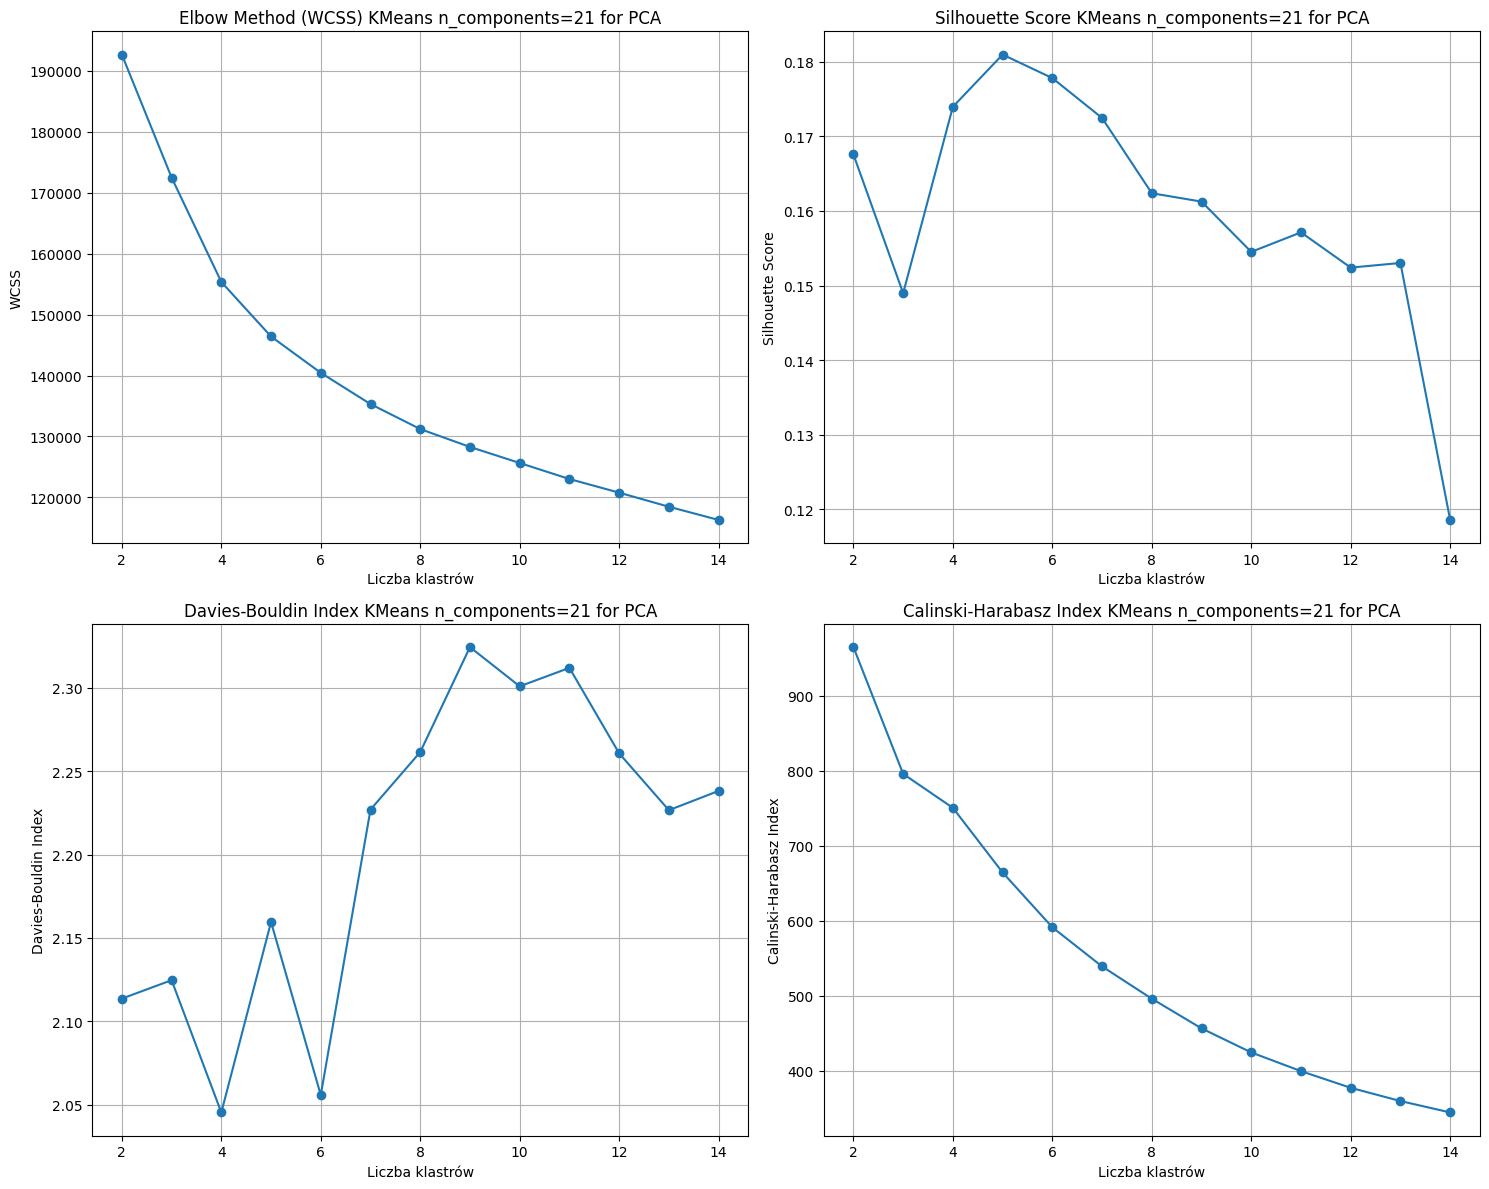

In [164]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Listy do przechowywania wyników
wcss = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Obliczanie metryk dla różnych liczby klastrów
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    labels = kmeans.fit_predict(final_df_pca_21_components)
    
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(final_df_pca_21_components, labels))
    davies_bouldin_scores.append(davies_bouldin_score(final_df_pca_21_components, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(final_df_pca_21_components, labels))

# Wykresy wszystkich metryk
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# WCSS
axs[0, 0].plot(range(2, 15), wcss, marker='o')
axs[0, 0].set_xlabel('Liczba klastrów')
axs[0, 0].set_ylabel('WCSS')
axs[0, 0].set_title('Elbow Method (WCSS) KMeans n_components=21 for PCA')
axs[0, 0].grid(True)

# Silhouette Score
axs[0, 1].plot(range(2, 15), silhouette_scores, marker='o')
axs[0, 1].set_xlabel('Liczba klastrów')
axs[0, 1].set_ylabel('Silhouette Score')
axs[0, 1].set_title('Silhouette Score KMeans n_components=21 for PCA')
axs[0, 1].grid(True)

# Davies-Bouldin Index
axs[1, 0].plot(range(2, 15), davies_bouldin_scores, marker='o')
axs[1, 0].set_xlabel('Liczba klastrów')
axs[1, 0].set_ylabel('Davies-Bouldin Index')
axs[1, 0].set_title('Davies-Bouldin Index KMeans n_components=21 for PCA')
axs[1, 0].grid(True)

# Calinski-Harabasz Index
axs[1, 1].plot(range(2, 15), calinski_harabasz_scores, marker='o')
axs[1, 1].set_xlabel('Liczba klastrów')
axs[1, 1].set_ylabel('Calinski-Harabasz Index')
axs[1, 1].set_title('Calinski-Harabasz Index KMeans n_components=21 for PCA')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

Concusions:<br>

Elbow Method: 4 clusters<br>
Silhouette Score: 5 clusters<br>
Davies-Bouldin: 4 clusters<br>
Calinski-Harabasz: 2 clusters<br>

In [168]:
# Tworzenie potrzebnego DataFrame
pca_df_21_components = pd.DataFrame(final_df_pca_21_components, columns=[f'PCA{i+1}' for i in range(21)])

# Klasteryzacja KMeans dla różnych liczby klastrów
cluster_counts = {
    'elbow_method_kmeans': 4,
    'silhouette_score_kmeans': 5,
    'davies_bouldin_kmeans': 4,
    'calinski_harabasz_kmeans': 2
}

# Tworzenie kolumn z klasteryzacją dla każdej metryki
for method, n_clusters in cluster_counts.items():
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(final_df_pca_21_components)
    pca_df_21_components[f'clusters_{method}'] = clusters

# Ocena wyników klasteryzacji dla każdej metryki
results = []

for method in cluster_counts.keys():
    clusters = pca_df_21_components[f'clusters_{method}']
    scores = evaluate_clustering(final_df_pca_21_components, clusters)
    results.append((method, scores))

# Wyświetlenie wyników
results_df = pd.DataFrame(results, columns=['Method', 'Scores'])
results_df['Silhouette Score'] = results_df['Scores'].apply(lambda x: x['Silhouette Score'])
results_df['Davies-Bouldin Index'] = results_df['Scores'].apply(lambda x: x['Davies-Bouldin Index'])
results_df['Calinski-Harabasz Index'] = results_df['Scores'].apply(lambda x: x['Calinski-Harabasz Index'])
results_df = results_df.drop(columns=['Scores'])

In [167]:
results_df

Method  Silhouette Score  Davies-Bouldin Index  \
0       elbow_method_kmeans          0.173976              2.045287   
1   silhouette_score_kmeans          0.180975              2.159492   
2     davies_bouldin_kmeans          0.173976              2.045287   
3  calinski_harabasz_kmeans          0.167580              2.113573   

   Calinski-Harabasz Index  
0               750.662226  
1               664.439147  
2               750.662226  
3               965.231344

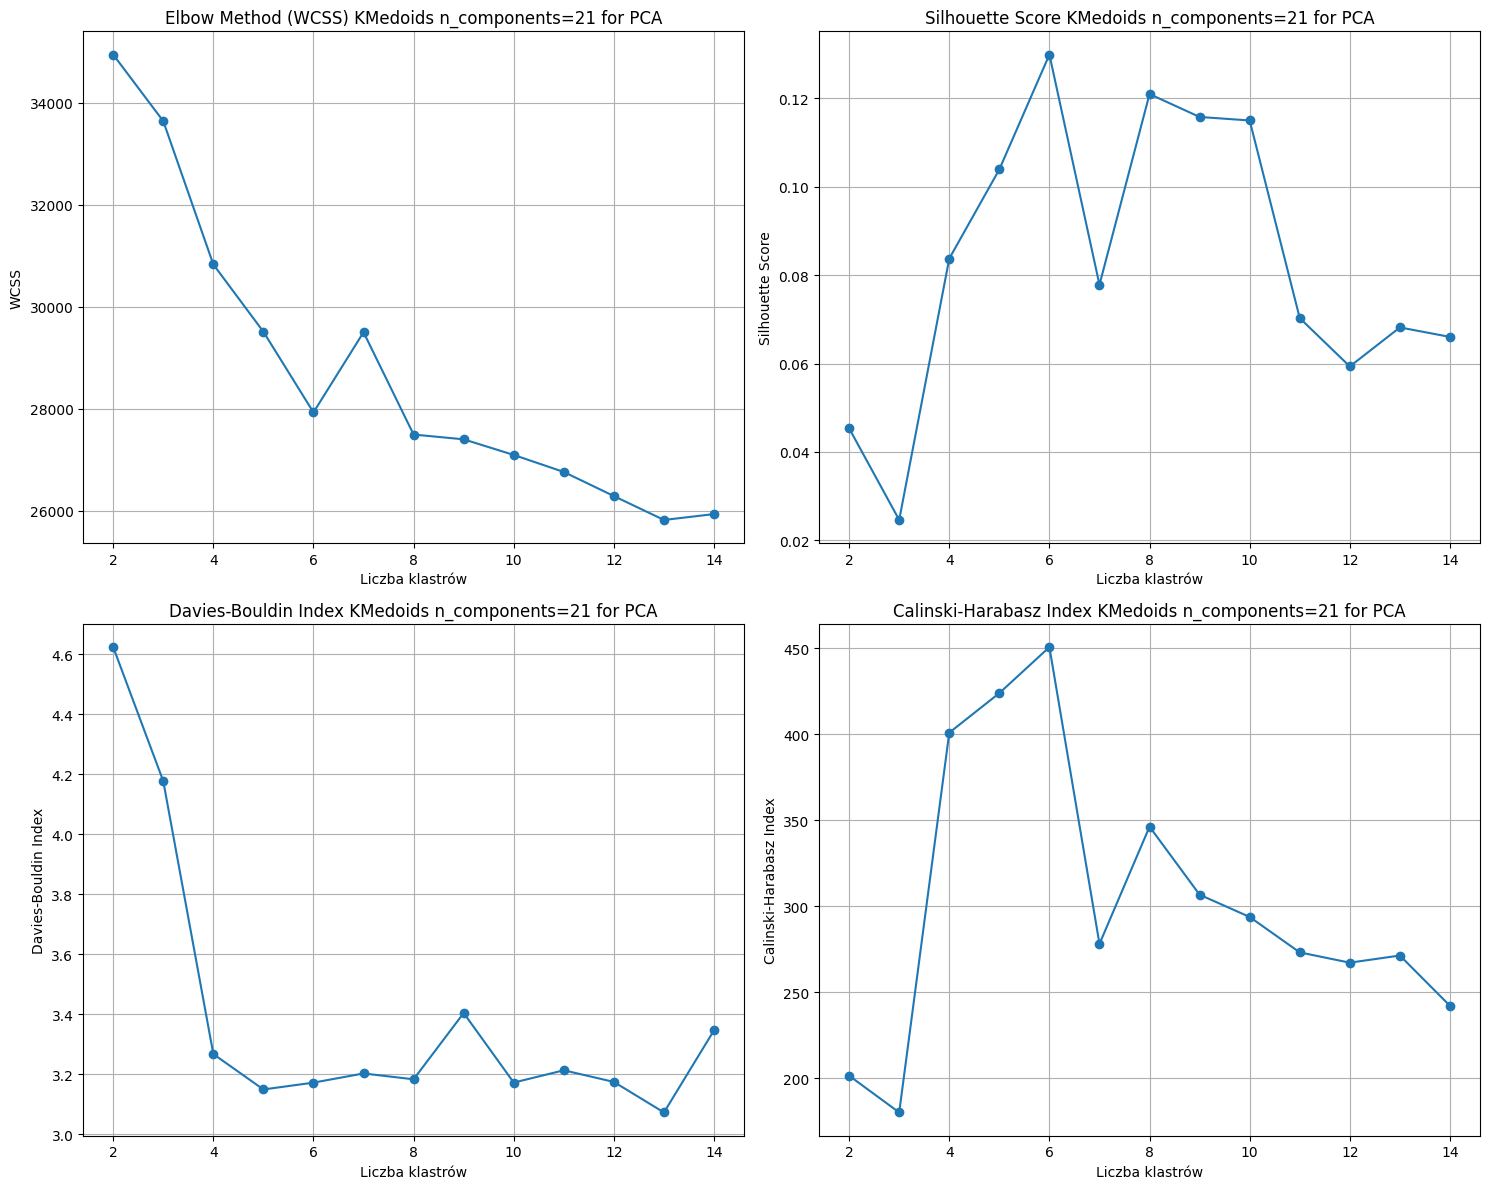

In [172]:
# Listy do przechowywania wyników
wcss = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Obliczanie metryk dla różnych liczby klastrów
for i in range(2, 15):
    kmedoids = KMedoids(n_clusters=i, random_state=42)
    labels = kmedoids.fit_predict(final_df_pca_21_components)
    
    wcss.append(kmedoids.inertia_)
    silhouette_scores.append(silhouette_score(final_df_pca_21_components, labels))
    davies_bouldin_scores.append(davies_bouldin_score(final_df_pca_21_components, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(final_df_pca_21_components, labels))

# Wykresy wszystkich metryk
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# WCSS
axs[0, 0].plot(range(2, 15), wcss, marker='o')
axs[0, 0].set_xlabel('Liczba klastrów')
axs[0, 0].set_ylabel('WCSS')
axs[0, 0].set_title('Elbow Method (WCSS) KMedoids n_components=21 for PCA')
axs[0, 0].grid(True)

# Silhouette Score
axs[0, 1].plot(range(2, 15), silhouette_scores, marker='o')
axs[0, 1].set_xlabel('Liczba klastrów')
axs[0, 1].set_ylabel('Silhouette Score')
axs[0, 1].set_title('Silhouette Score KMedoids n_components=21 for PCA')
axs[0, 1].grid(True)

# Davies-Bouldin Index
axs[1, 0].plot(range(2, 15), davies_bouldin_scores, marker='o')
axs[1, 0].set_xlabel('Liczba klastrów')
axs[1, 0].set_ylabel('Davies-Bouldin Index')
axs[1, 0].set_title('Davies-Bouldin Index KMedoids n_components=21 for PCA')
axs[1, 0].grid(True)

# Calinski-Harabasz Index
axs[1, 1].plot(range(2, 15), calinski_harabasz_scores, marker='o')
axs[1, 1].set_xlabel('Liczba klastrów')
axs[1, 1].set_ylabel('Calinski-Harabasz Index')
axs[1, 1].set_title('Calinski-Harabasz Index KMedoids n_components=21 for PCA')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

Concusions:<br>

Elbow Method: 4 clusters<br>
Silhouette Score: 6 clusters<br>
Davies-Bouldin: 13 clusters<br>
Calinski-Harabasz: 6 clusters<br>

In [173]:
# Tworzenie potrzebnego DataFrame
pca_df_21_components = pd.DataFrame(final_df_pca_21_components, columns=[f'PCA{i+1}' for i in range(21)])

# Klasteryzacja KMeans dla różnych liczby klastrów
cluster_counts = {
    'elbow_method_kmedoids': 4,
    'silhouette_score_kmedoids': 6,
    'davies_bouldin_kmedoids': 13,
    'calinski_harabasz_kmedoids': 6
}

# Tworzenie kolumn z klasteryzacją dla każdej metryki
for method, n_clusters in cluster_counts.items():
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(final_df_pca_21_components)
    pca_df_21_components[f'clusters_{method}'] = clusters

# Ocena wyników klasteryzacji dla każdej metryki
results = []

for method in cluster_counts.keys():
    clusters = pca_df_21_components[f'clusters_{method}']
    scores = evaluate_clustering(final_df_pca_21_components, clusters)
    results.append((method, scores))

# Wyświetlenie wyników
results_df = pd.DataFrame(results, columns=['Method', 'Scores'])
results_df['Silhouette Score'] = results_df['Scores'].apply(lambda x: x['Silhouette Score'])
results_df['Davies-Bouldin Index'] = results_df['Scores'].apply(lambda x: x['Davies-Bouldin Index'])
results_df['Calinski-Harabasz Index'] = results_df['Scores'].apply(lambda x: x['Calinski-Harabasz Index'])
results_df = results_df.drop(columns=['Scores'])

In [174]:
results_df

Method  Silhouette Score  Davies-Bouldin Index  \
0       elbow_method_kmedoids          0.173997              2.045297   
1   silhouette_score_kmedoids          0.177886              2.056691   
2     davies_bouldin_kmedoids          0.118303              2.278709   
3  calinski_harabasz_kmedoids          0.177886              2.056691   

   Calinski-Harabasz Index  
0               750.686013  
1               591.192524  
2               360.546944  
3               591.192524

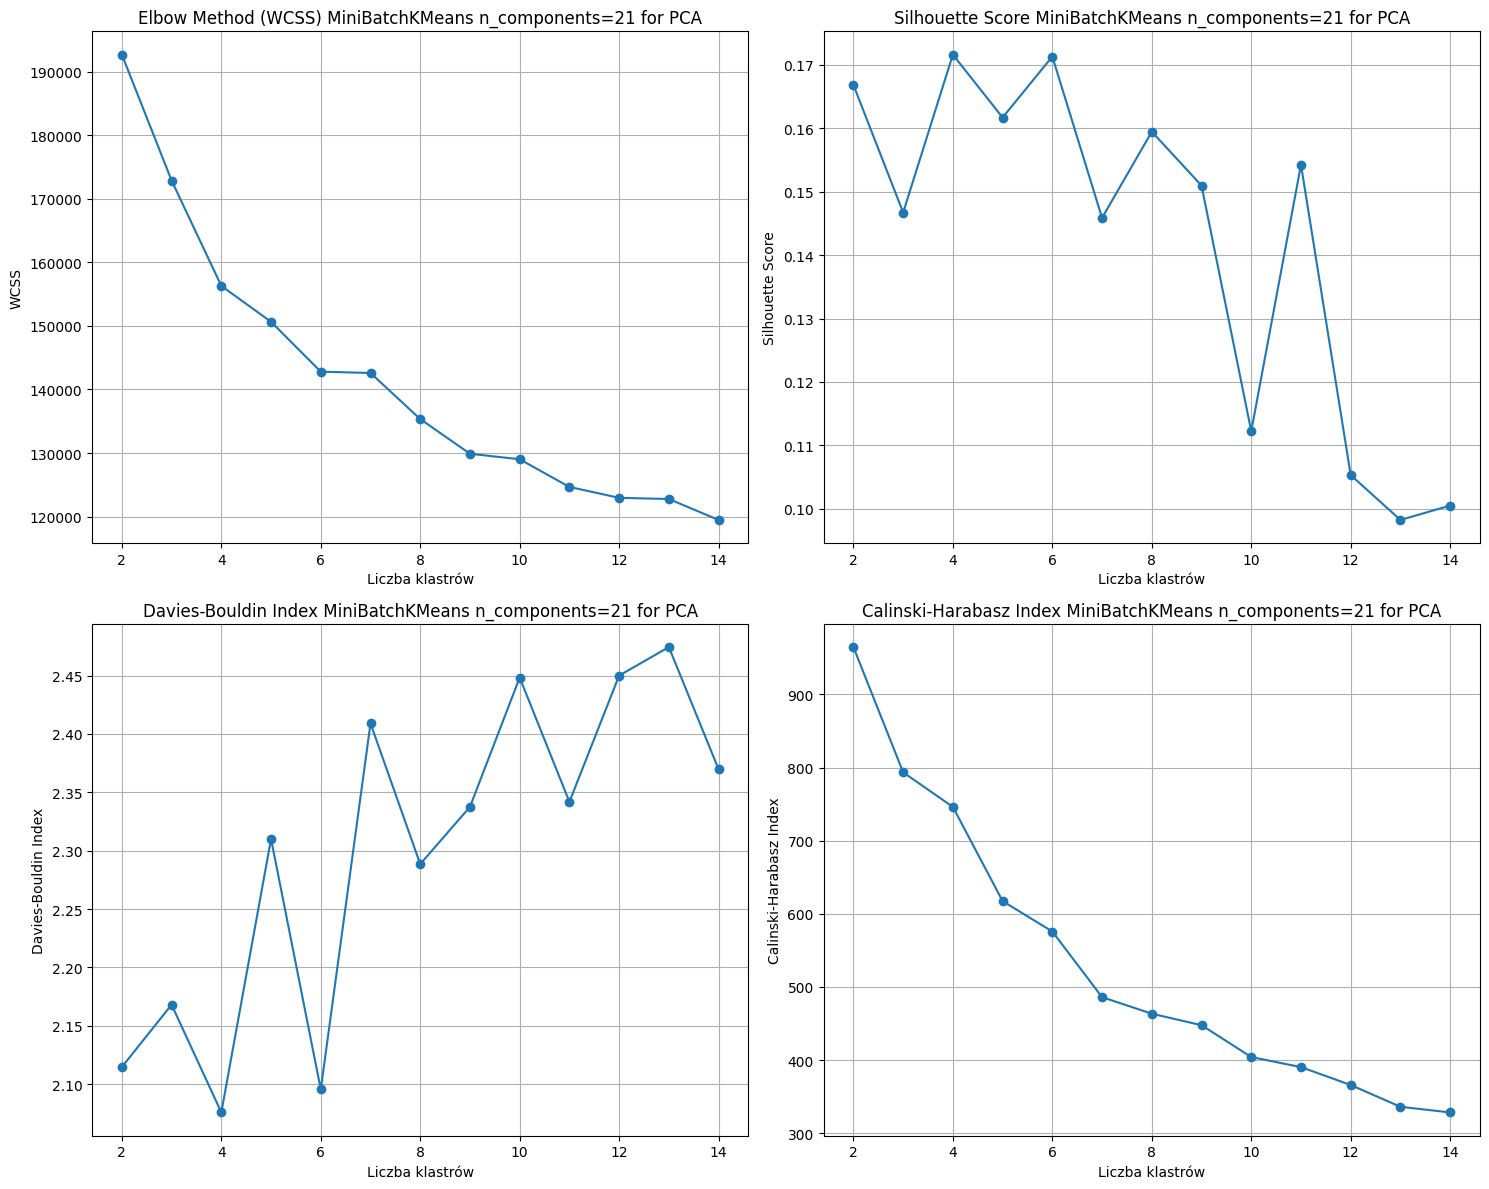

In [175]:
# Listy do przechowywania wyników
wcss = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Obliczanie metryk dla różnych liczby klastrów
for i in range(2, 15):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=i, n_init=10, random_state=42)
    labels = minibatch_kmeans.fit_predict(final_df_pca_21_components)
    
    wcss.append(minibatch_kmeans.inertia_)
    silhouette_scores.append(silhouette_score(final_df_pca_21_components, labels))
    davies_bouldin_scores.append(davies_bouldin_score(final_df_pca_21_components, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(final_df_pca_21_components, labels))

# Wykresy wszystkich metryk
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# WCSS
axs[0, 0].plot(range(2, 15), wcss, marker='o')
axs[0, 0].set_xlabel('Liczba klastrów')
axs[0, 0].set_ylabel('WCSS')
axs[0, 0].set_title('Elbow Method (WCSS) MiniBatchKMeans n_components=21 for PCA')
axs[0, 0].grid(True)

# Silhouette Score
axs[0, 1].plot(range(2, 15), silhouette_scores, marker='o')
axs[0, 1].set_xlabel('Liczba klastrów')
axs[0, 1].set_ylabel('Silhouette Score')
axs[0, 1].set_title('Silhouette Score MiniBatchKMeans n_components=21 for PCA')
axs[0, 1].grid(True)

# Davies-Bouldin Index
axs[1, 0].plot(range(2, 15), davies_bouldin_scores, marker='o')
axs[1, 0].set_xlabel('Liczba klastrów')
axs[1, 0].set_ylabel('Davies-Bouldin Index')
axs[1, 0].set_title('Davies-Bouldin Index MiniBatchKMeans n_components=21 for PCA')
axs[1, 0].grid(True)

# Calinski-Harabasz Index
axs[1, 1].plot(range(2, 15), calinski_harabasz_scores, marker='o')
axs[1, 1].set_xlabel('Liczba klastrów')
axs[1, 1].set_ylabel('Calinski-Harabasz Index')
axs[1, 1].set_title('Calinski-Harabasz Index MiniBatchKMeans n_components=21 for PCA')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

Concusions:<br>

Elbow Method: 4 clusters<br>
Silhouette Score: 4 clusters<br>
Davies-Bouldin: 4 clusters<br>
Calinski-Harabasz: 2 clusters<br>

In [177]:
# Klasteryzacja MiniBatchKMeans dla różnych liczby klastrów
cluster_counts = {
    'elbow_method_minibatchkmeans': 4,
    'silhouette_score_minibatchkmeans': 4,
    'davies_bouldin_minibatchkmeans': 4,
    'calinski_harabasz_minibatchkmeans': 2
}

# Tworzenie kolumn z klasteryzacją dla każdej metryki
for method, n_clusters in cluster_counts.items():
    minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    clusters = minibatch_kmeans.fit_predict(final_df_pca_21_components)
    pca_df_21_components[f'clusters_{method}'] = clusters

# Ocena wyników klasteryzacji dla każdej metryki
results = []

for method in cluster_counts.keys():
    clusters = pca_df_21_components[f'clusters_{method}']
    scores = evaluate_clustering(final_df_pca_21_components, clusters)
    results.append((method, scores))

# Wyświetlenie wyników
results_df = pd.DataFrame(results, columns=['Method', 'Scores'])
results_df['Silhouette Score'] = results_df['Scores'].apply(lambda x: x['Silhouette Score'])
results_df['Davies-Bouldin Index'] = results_df['Scores'].apply(lambda x: x['Davies-Bouldin Index'])
results_df['Calinski-Harabasz Index'] = results_df['Scores'].apply(lambda x: x['Calinski-Harabasz Index'])
results_df = results_df.drop(columns=['Scores'])

In [178]:
results_df

Method  Silhouette Score  Davies-Bouldin Index  \
0       elbow_method_minibatchkmeans          0.171631              2.075856   
1   silhouette_score_minibatchkmeans          0.171631              2.075856   
2     davies_bouldin_minibatchkmeans          0.171631              2.075856   
3  calinski_harabasz_minibatchkmeans          0.166840              2.114747   

   Calinski-Harabasz Index  
0               746.208181  
1               746.208181  
2               746.208181  
3               964.718232

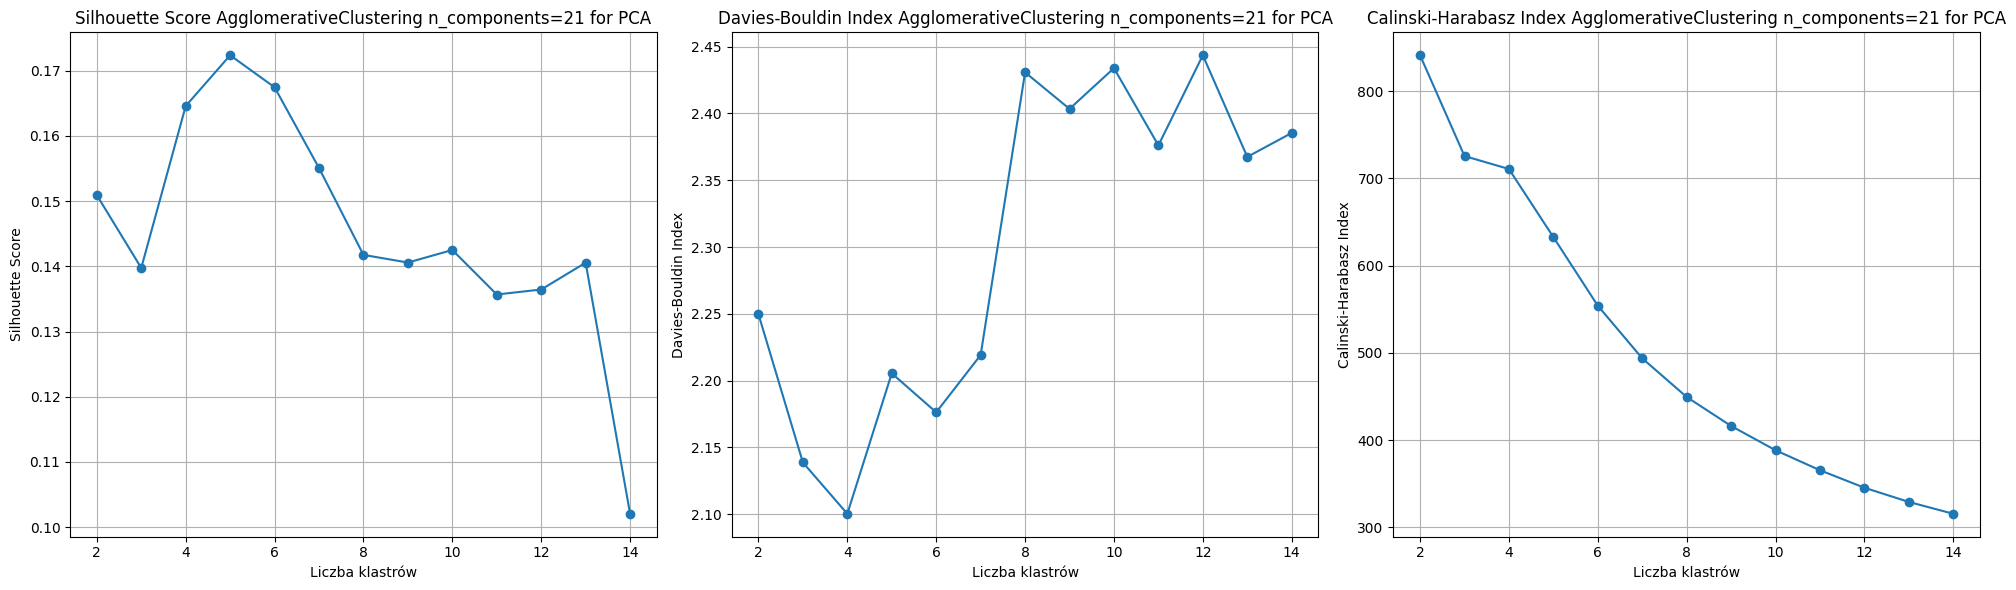

In [181]:
# Załaduj dane (final_df) i przeprowadź PCA
n_components = 21
pca = PCA(n_components=n_components)
final_df_pca_21_components = pca.fit_transform(final_df)

# Konwersja wyniku z powrotem do DataFrame
pca_columns = [f'PCA{i+1}' for i in range(n_components)]
final_df_pca_21_components = pd.DataFrame(final_df_pca_21_components, columns=pca_columns)

# Listy do przechowywania wyników
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Obliczanie metryk dla różnych liczby klastrów
for i in range(2, 15):
    agglomerative_clustering = AgglomerativeClustering(n_clusters=i)
    labels = agglomerative_clustering.fit_predict(final_df_pca_21_components)
    
    silhouette_scores.append(silhouette_score(final_df_pca_21_components, labels))
    davies_bouldin_scores.append(davies_bouldin_score(final_df_pca_21_components, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(final_df_pca_21_components, labels))

# Wykresy wszystkich metryk
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Silhouette Score
axs[0].plot(range(2, 15), silhouette_scores, marker='o')
axs[0].set_xlabel('Liczba klastrów')
axs[0].set_ylabel('Silhouette Score')
axs[0].set_title('Silhouette Score AgglomerativeClustering n_components=21 for PCA')
axs[0].grid(True)

# Davies-Bouldin Index
axs[1].plot(range(2, 15), davies_bouldin_scores, marker='o')
axs[1].set_xlabel('Liczba klastrów')
axs[1].set_ylabel('Davies-Bouldin Index')
axs[1].set_title('Davies-Bouldin Index AgglomerativeClustering n_components=21 for PCA')
axs[1].grid(True)

# Calinski-Harabasz Index
axs[2].plot(range(2, 15), calinski_harabasz_scores, marker='o')
axs[2].set_xlabel('Liczba klastrów')
axs[2].set_ylabel('Calinski-Harabasz Index')
axs[2].set_title('Calinski-Harabasz Index AgglomerativeClustering n_components=21 for PCA')
axs[2].grid(True)

plt.tight_layout()
plt.show()

In [182]:
# Klasteryzacja MiniBatchKMeans dla różnych liczby klastrów
cluster_counts = {
    'silhouette_score_minibatchkmeans': 5,
    'davies_bouldin_minibatchkmeans': 4,
    'calinski_harabasz_minibatchkmeans': 2
}

# Tworzenie kolumn z klasteryzacją dla każdej metryki
for method, n_clusters in cluster_counts.items():
    agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = agglomerative_clustering.fit_predict(final_df_pca_21_components)
    pca_df_21_components[f'clusters_{method}'] = clusters

# Ocena wyników klasteryzacji dla każdej metryki
results = []

for method in cluster_counts.keys():
    clusters = pca_df_21_components[f'clusters_{method}']
    scores = evaluate_clustering(final_df_pca_21_components, clusters)
    results.append((method, scores))

# Wyświetlenie wyników
results_df = pd.DataFrame(results, columns=['Method', 'Scores'])
results_df['Silhouette Score'] = results_df['Scores'].apply(lambda x: x['Silhouette Score'])
results_df['Davies-Bouldin Index'] = results_df['Scores'].apply(lambda x: x['Davies-Bouldin Index'])
results_df['Calinski-Harabasz Index'] = results_df['Scores'].apply(lambda x: x['Calinski-Harabasz Index'])
results_df = results_df.drop(columns=['Scores'])

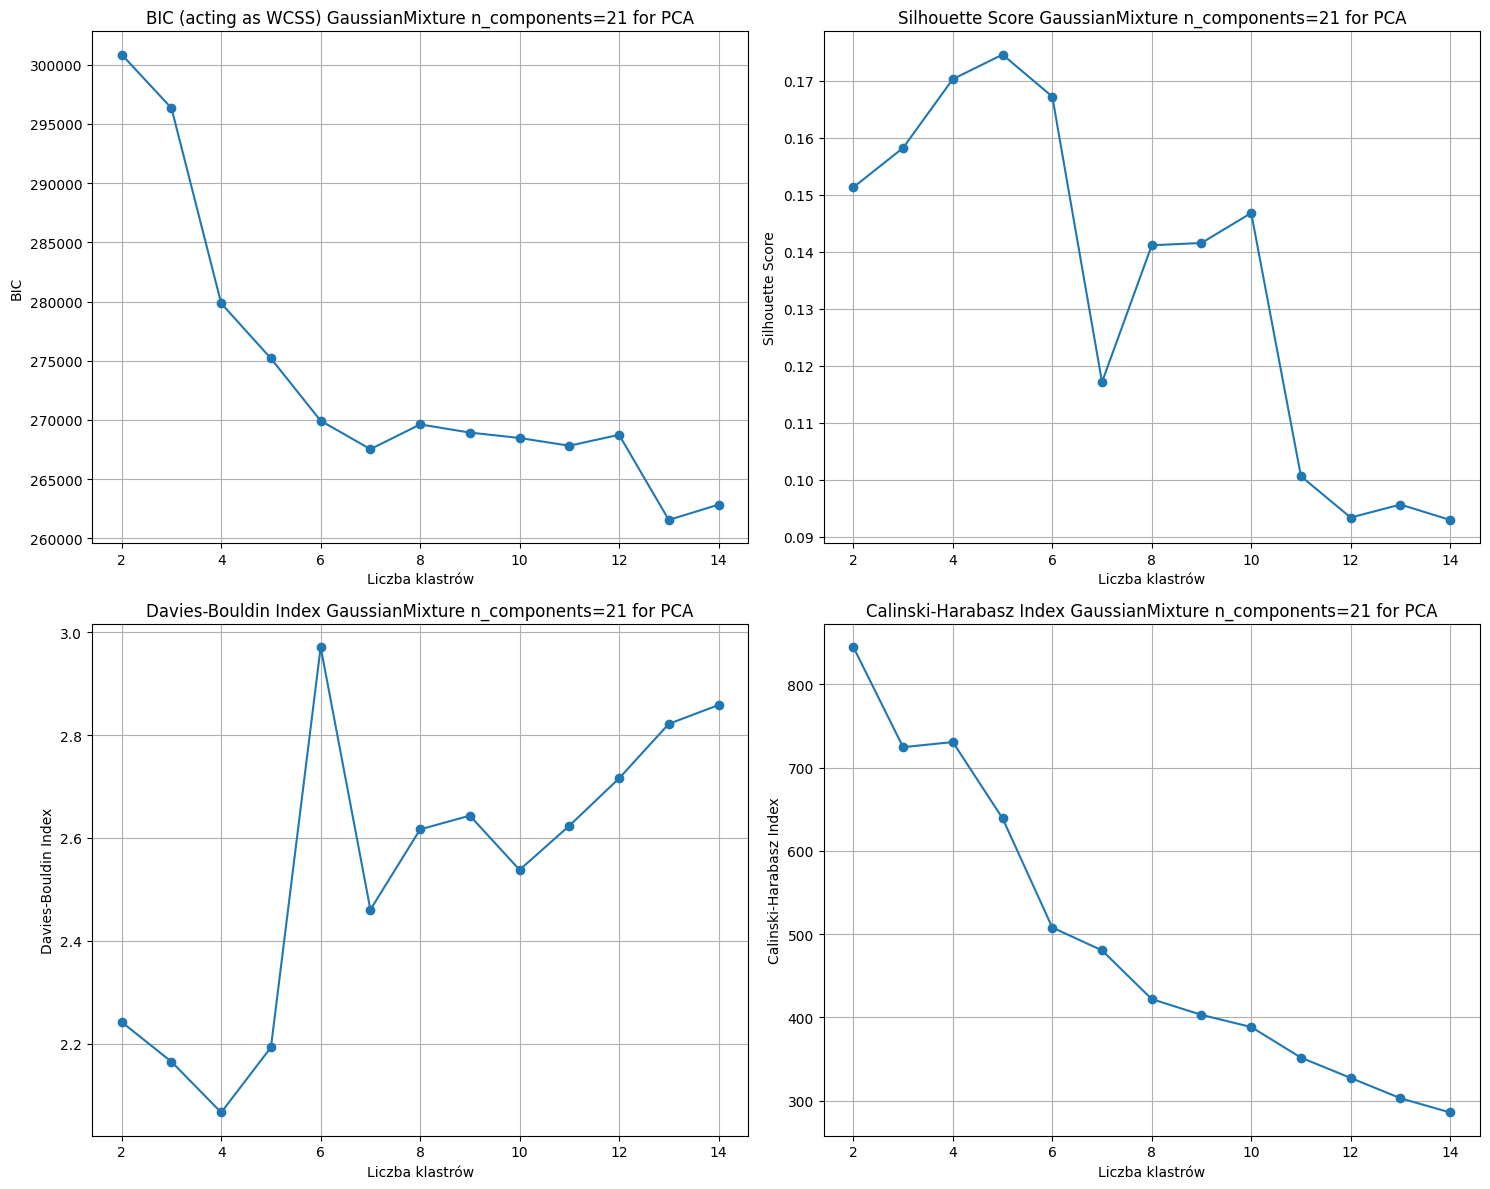

In [184]:
# Załaduj dane (final_df) i przeprowadź PCA
n_components = 21
pca = PCA(n_components=n_components)
final_df_pca_21_components = pca.fit_transform(final_df)

# Konwersja wyniku z powrotem do DataFrame
pca_columns = [f'PCA{i+1}' for i in range(n_components)]
final_df_pca_21_components = pd.DataFrame(final_df_pca_21_components, columns=pca_columns)

# Listy do przechowywania wyników
wcss = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Obliczanie metryk dla różnych liczby klastrów
for i in range(2, 15):
    gaussian_mixture = GaussianMixture(n_components=i, random_state=42)
    labels = gaussian_mixture.fit_predict(final_df_pca_21_components)
    
    # WCSS is not directly available for Gaussian Mixture, hence using BIC instead
    wcss.append(gaussian_mixture.bic(final_df_pca_21_components))
    silhouette_scores.append(silhouette_score(final_df_pca_21_components, labels))
    davies_bouldin_scores.append(davies_bouldin_score(final_df_pca_21_components, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(final_df_pca_21_components, labels))

# Wykresy wszystkich metryk
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# BIC (acting as WCSS)
axs[0, 0].plot(range(2, 15), wcss, marker='o')
axs[0, 0].set_xlabel('Liczba klastrów')
axs[0, 0].set_ylabel('BIC')
axs[0, 0].set_title('BIC (acting as WCSS) GaussianMixture n_components=21 for PCA')
axs[0, 0].grid(True)

# Silhouette Score
axs[0, 1].plot(range(2, 15), silhouette_scores, marker='o')
axs[0, 1].set_xlabel('Liczba klastrów')
axs[0, 1].set_ylabel('Silhouette Score')
axs[0, 1].set_title('Silhouette Score GaussianMixture n_components=21 for PCA')
axs[0, 1].grid(True)

# Davies-Bouldin Index
axs[1, 0].plot(range(2, 15), davies_bouldin_scores, marker='o')
axs[1, 0].set_xlabel('Liczba klastrów')
axs[1, 0].set_ylabel('Davies-Bouldin Index')
axs[1, 0].set_title('Davies-Bouldin Index GaussianMixture n_components=21 for PCA')
axs[1, 0].grid(True)

# Calinski-Harabasz Index
axs[1, 1].plot(range(2, 15), calinski_harabasz_scores, marker='o')
axs[1, 1].set_xlabel('Liczba klastrów')
axs[1, 1].set_ylabel('Calinski-Harabasz Index')
axs[1, 1].set_title('Calinski-Harabasz Index GaussianMixture n_components=21 for PCA')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

Concusions:<br>

BIC method: 13 clusters<br>
Silhouette Score: 5 clusters<br>
Davies-Bouldin: 4 clusters<br>
Calinski-Harabasz: 2 clusters<br>

In [185]:
# Lista klastrów dla różnych metryk
cluster_counts = {
    'BIC_method_gaussianmixture':13,
    'silhouette_score_gaussianmixture': 5,  # Najlepsza liczba klastrów z analizy BIC
    'davies_bouldin_gaussianmixture': 4,
    'calinski_harabasz_gaussianmixture': 2
}

# Tworzenie kolumn z klasteryzacją dla każdej metryki
for method, n_clusters in cluster_counts.items():
    gaussian_mixture = GaussianMixture(n_components=n_clusters, random_state=42)
    clusters = gaussian_mixture.fit_predict(final_df_pca_21_components)
    final_df_pca_21_components[f'clusters_{method}'] = clusters

# Funkcja oceniająca wyniki klasteryzacji
def evaluate_clustering(data, labels):
    scores = {
        'Silhouette Score': silhouette_score(data, labels),
        'Davies-Bouldin Index': davies_bouldin_score(data, labels),
        'Calinski-Harabasz Index': calinski_harabasz_score(data, labels)
    }
    return scores

# Ocena wyników klasteryzacji dla każdej metryki
results = []

for method in cluster_counts.keys():
    clusters = final_df_pca_21_components[f'clusters_{method}']
    scores = evaluate_clustering(final_df_pca_21_components, clusters)
    results.append((method, scores))

# Wyświetlenie wyników
results_df = pd.DataFrame(results, columns=['Method', 'Scores'])
results_df['Silhouette Score'] = results_df['Scores'].apply(lambda x: x['Silhouette Score'])
results_df['Davies-Bouldin Index'] = results_df['Scores'].apply(lambda x: x['Davies-Bouldin Index'])
results_df['Calinski-Harabasz Index'] = results_df['Scores'].apply(lambda x: x['Calinski-Harabasz Index'])
results_df = results_df.drop(columns=['Scores'])

In [186]:
results_df

Method  Silhouette Score  Davies-Bouldin Index  \
0         BIC_method_gaussianmixture          0.198247              2.148798   
1   silhouette_score_gaussianmixture          0.221914              1.558698   
2     davies_bouldin_gaussianmixture          0.220725              1.633938   
3  calinski_harabasz_gaussianmixture          0.152037              1.855931   

   Calinski-Harabasz Index  
0               514.017284  
1               886.855319  
2               911.366031  
3               598.391947

Final conclusions for PCA<br>

It seems like for PCA the best choice is to take 5 clusters for model Gaussian Mixture beacuse it gives us total Silhouette Score of 0.22

In [194]:
final_df
#uzyj innego sposobu wyboru cech, to co Ci podopowiada chat gpt

seconds_elapsed  location_bearingAccuracy  location_speedAccuracy  \
0           -0.409811                 -0.748948               -0.951894   
1            0.839170                  1.292338                0.680699   
2            0.261034                  1.006778                0.543938   
3            0.410543                 -0.748948               -0.951894   
4            1.423342                 -0.748948               -0.951894   
...               ...                       ...                     ...   
4395         0.359123                 -0.748948                1.188585   
4396         0.573684                 -0.748948                1.139057   
4397         0.574882                 -0.748948               -0.951894   
4398        -0.369984                 -0.748948               -0.148843   
4399        -1.329566                 -0.748948               -0.951894   

      location_verticalAccuracy  location_horizontalAccuracy  location_speed  \
0                      1.596211                    -0.697028        0.544456   
1                      0.588914                    -1.015691        1.234460   
2                      0.195172                    -0.707783        1.292407   
3                     -0.143291                     0.751472        0.645767   
4                      0.680748                     0.794809        0.454102   
...                         ...                          ...             ...   
4395                  -1.240951                    -1.015691       -1.412803   
4396                  -1.244158                    -1.015691       -1.412805   
4397                  -0.978420                     1.255785       -0.437802   
4398                   1.242100                    -1.015691       -1.412805   
4399                   0.441042                    -0.642295       -0.651337   

      location_bearing  location_altitude  location_longitude  \
0             0.852789          -0.843090            0.102047   
1             0.832843          -1.892165           -0.807779   
2             0.891975          -0.843090           -0.219654   
3             0.885816          -0.921323           -0.141452   
4             0.512073           0.954902            0.828651   
...                ...                ...                 ...   
4395         -1.860594          -0.895363           -1.337812   
4396         -1.860594          -0.895363           -1.342756   
4397          0.408268           1.134511            1.405268   
4398         -1.860594          -1.074626           -1.230016   
4399          0.740487           1.248478            0.905371   

      location_latitude  ...  Bandpass_Gyroscope_z  avg_steps_per_minute  \
0             -2.602592  ...             -0.019612              0.672850   
1             -0.244861  ...             -0.968092              0.511529   
2              0.194446  ...             -2.047863             -0.327443   
3             -0.053219  ...             -0.862164              0.137373   
4             -0.252833  ...              2.100079              0.453509   
...                 ...  ...                   ...                   ...   
4395           1.105095  ...             -0.200703             -2.026666   
4396           1.099355  ...             -0.858326             -2.026666   
4397           0.064641  ...             -1.354158              0.651016   
4398          -0.845345  ...             -1.095051              0.647893   
4399           0.025101  ...             -0.006534              0.652051   

      bearing_east  bearing_north  bearing_south  bearing_west  \
0                0              0              0             1   
1                0              0              0             1   
2                0              0              0             1   
3                0              0              0             1   
4                1              0              0             0   
...            ...            ...            ...      

### For Second we choose features by Variance treshold

In [208]:
#Feature Selection

from sklearn.feature_selection import VarianceThreshold

# Selektor cech na podstawie wariancji
selector = VarianceThreshold(threshold=0.01)
X_high_variance = selector.fit_transform(final_df)

# Wyświetlenie wybranych cech
selected_features = final_df.columns[selector.get_support()]

# Tworzenie nowego DataFrame z wybranymi cechami
X_high_variance_df = pd.DataFrame(X_high_variance, columns=selected_features)

In [211]:
X_high_variance_df == final_df

seconds_elapsed  location_bearingAccuracy  location_speedAccuracy  \
0                True                      True                    True   
1                True                      True                    True   
2                True                      True                    True   
3                True                      True                    True   
4                True                      True                    True   
...               ...                       ...                     ...   
4395             True                      True                    True   
4396             True                      True                    True   
4397             True                      True                    True   
4398             True                      True                    True   
4399             True                      True                    True   

      location_verticalAccuracy  location_horizontalAccuracy  location_speed  \
0                          True                         True            True   
1                          True                         True            True   
2                          True                         True            True   
3                          True                         True            True   
4                          True                         True            True   
...                         ...                          ...             ...   
4395                       True                         True            True   
4396                       True                         True            True   
4397                       True                         True            True   
4398                       True                         True            True   
4399                       True                         True            True   

      location_bearing  location_altitude  location_longitude  \
0                 True               True                True   
1                 True               True                True   
2                 True               True                True   
3                 True               True                True   
4                 True               True                True   
...                ...                ...                 ...   
4395              True               True                True   
4396              True               True                True   
4397              True               True                True   
4398              True               True                True   
4399              True               True                True   

      location_latitude  ...  Bandpass_Gyroscope_z  avg_steps_per_minute  \
0                  True  ...                  True                  True   
1                  True  ...                  True                  True   
2                  True  ...                  True                  True   
3                  True  ...                  True                  True   
4                  True  ...                  True                  True   
...                 ...  ...                   ...                   ...   
4395               True  ...                  True                  True   
4396               True  ...                  True                  True   
4397               True  ...                  True                  True   
4398               True  ...                  True                  True   
4399               True  ...                  True                  True   

      bearing_east  bearing_north  bearing_south  bearing_west  \
0             True           True           True          True   
1             True           True           True          True   
2             True           True           True          True   
3             True           True           True          True   
4             True           True           True          True   
...            ...            ...            ...      

It looks like Variance Treshold returns the same results, let's try different technique

### Feature Clustering

#### selecting right amount of clusters by dendrogram

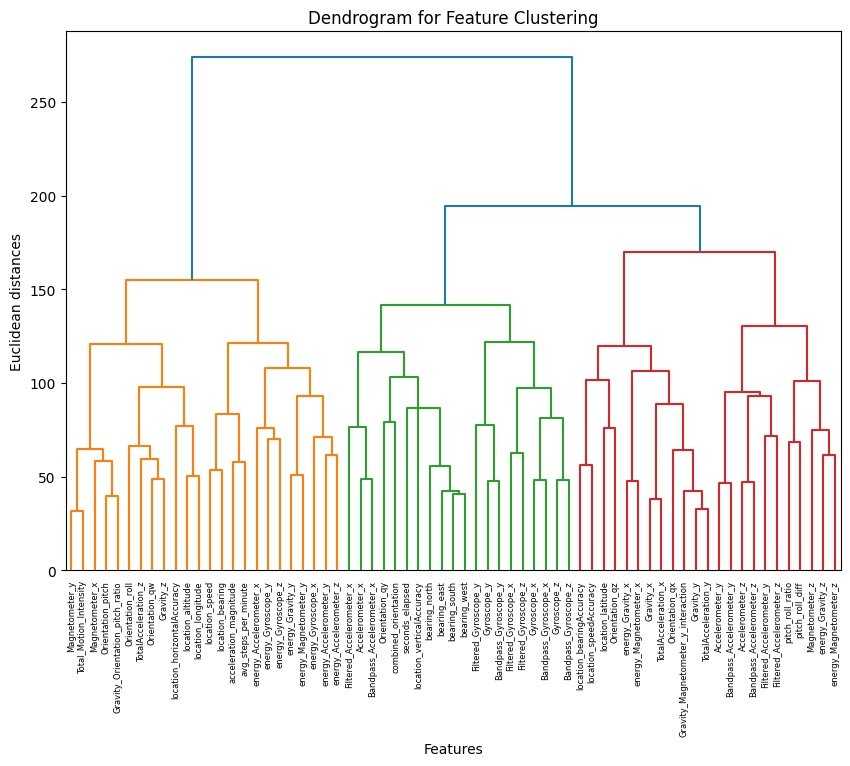

In [214]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Obliczenie macierzy odległości
Z = linkage(final_df.T, method='ward')

# Rysowanie dendrogramu
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=final_df.columns)
plt.title('Dendrogram for Feature Clustering')
plt.xlabel('Features')
plt.ylabel('Euclidean distances')
plt.show()

By Dendrogram we see that right amount of clusters is equal to 3

In [242]:
from sklearn.cluster import FeatureAgglomeration

# Klasteryzacja cech
agglo = FeatureAgglomeration(n_clusters=3)  # Ustaw odpowiednią liczbę klastrów
X_agglo = agglo.fit_transform(final_df)

# Tworzenie DataFrame z wyselekcjonowanymi cechami
final_df_agglo_selected = pd.DataFrame(X_agglo, columns=[f'Cluster_{i+1}' for i in range(X_agglo.shape[1])])

Now let's try typical KMeans

In [243]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Klasteryzacja KMeans na wyselekcjonowanych cechach
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(final_df_agglo_selected)

# Dodanie klastrów do DataFrame
final_df_agglo_selected['Cluster'] = clusters

c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


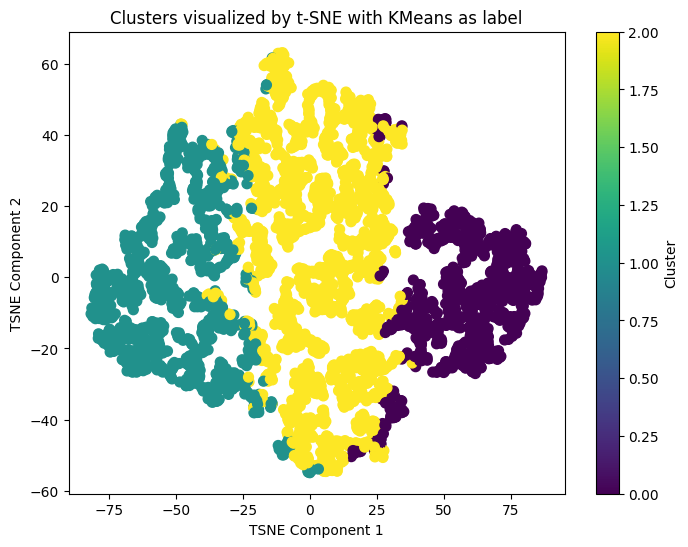

In [244]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(final_df_agglo_selected.drop(columns=['Cluster']))

# Tworzenie DataFrame z wynikami t-SNE
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = clusters

# Wizualizacja wyników klasteryzacji za pomocą t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['Cluster'], cmap='viridis', s=50)
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('Clusters visualized by t-SNE with KMeans as label')
plt.colorbar(label='Cluster')
plt.show()

but there might be different results for other algorithms, let's compare them

In [245]:
final_df_agglo_selected.drop(columns=['Cluster'], inplace=True)

Trying different algorithms and getting results

In [246]:
# Definicja różnych algorytmów klasteryzacji
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=3, random_state=42),
    'KMedoids': KMedoids(n_clusters=3, random_state=42),
    'MiniBatchKMeans': MiniBatchKMeans(n_clusters=3, random_state=42),
    'SpectralClustering': SpectralClustering(n_clusters=3, random_state=42, affinity='nearest_neighbors'),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3),
    'GaussianMixture': GaussianMixture(n_components=3, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

# Listy do przechowywania wyników
results = []

# Obliczanie metryk dla różnych algorytmów klasteryzacji
for name, algorithm in clustering_algorithms.items():
    if name == 'DBSCAN':
        labels = algorithm.fit_predict(final_df_agglo_selected)
        if len(set(labels)) <= 1:  # DBSCAN might result in a single cluster
            silhouette_avg = -1
            davies_bouldin = np.inf
            calinski_harabasz = 0
        else:
            silhouette_avg = silhouette_score(final_df_agglo_selected, labels)
            davies_bouldin = davies_bouldin_score(final_df_agglo_selected, labels)
            calinski_harabasz = calinski_harabasz_score(final_df_agglo_selected, labels)
    elif name == 'GaussianMixture':
        labels = algorithm.fit_predict(final_df_agglo_selected)
        silhouette_avg = silhouette_score(final_df_agglo_selected, labels)
        davies_bouldin = davies_bouldin_score(final_df_agglo_selected, labels)
        calinski_harabasz = calinski_harabasz_score(final_df_agglo_selected, labels)
    else:
        labels = algorithm.fit_predict(final_df_agglo_selected)
        silhouette_avg = silhouette_score(final_df_agglo_selected, labels)
        davies_bouldin = davies_bouldin_score(final_df_agglo_selected, labels)
        calinski_harabasz = calinski_harabasz_score(final_df_agglo_selected, labels)
    
    results.append({
        'Algorithm': name,
        'Silhouette Score': silhouette_avg,
        'Davies-Bouldin Index': davies_bouldin,
        'Calinski-Harabasz Index': calinski_harabasz
    })

# Konwersja wyników do DataFrame
results_df = pd.DataFrame(results)

c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


In [247]:
results_df

Algorithm  Silhouette Score  Davies-Bouldin Index  \
0                   KMeans          0.342309              1.032159   
1                 KMedoids          0.343258              1.028664   
2          MiniBatchKMeans          0.343719              1.023443   
3       SpectralClustering          0.333281              0.938716   
4  AgglomerativeClustering          0.314809              1.092979   
5          GaussianMixture          0.314936              1.077146   
6                   DBSCAN          0.537390              0.303027   

   Calinski-Harabasz Index  
0              3614.380894  
1              3601.919013  
2              3612.643580  
3              3311.452710  
4              3287.355051  
5              2898.553556  
6                 8.750716

The best one is DBSCAN

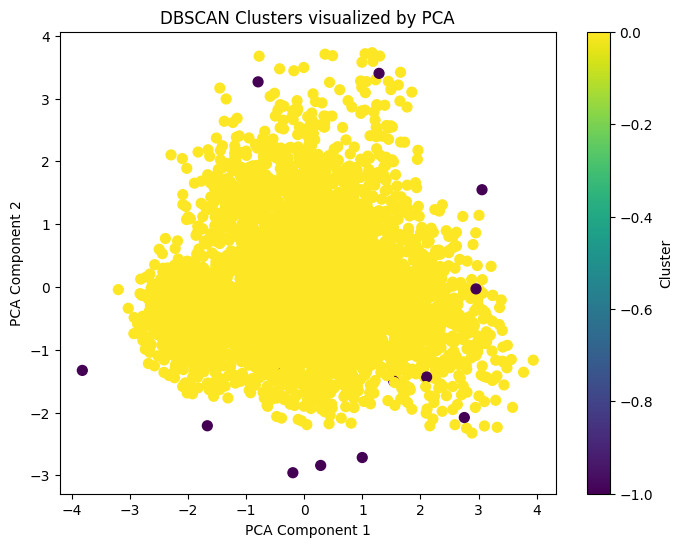

In [249]:
# Standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_df_agglo_selected)

# Klasteryzacja DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Dodanie klastrów do DataFrame
final_df_agglo_selected['DBSCAN_Cluster'] = labels

# Redukcja wymiarowości do 2D za pomocą PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Tworzenie DataFrame z wynikami PCA
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['DBSCAN_Cluster'] = labels

# Wizualizacja wyników klasteryzacji za pomocą PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['DBSCAN_Cluster'], cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clusters visualized by PCA')
plt.colorbar(label='Cluster')
plt.show()

Despite best results for DBSCAN, final results tend to be pointless

In [253]:
final_df_agglo_selected.drop(columns=['DBSCAN_Cluster'], inplace=True)

In [254]:
# Standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_df_agglo_selected)

# Klasteryzacja MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
labels = minibatch_kmeans.fit_predict(X_scaled)

# Dodanie klastrów do DataFrame
final_df_agglo_selected['MiniBatchKMeans_Cluster'] = labels

c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


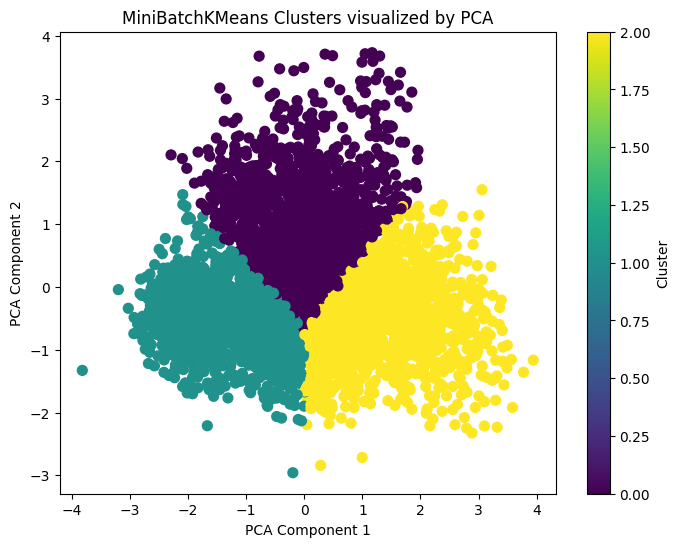

In [255]:
# Redukcja wymiarowości do 2D za pomocą PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Tworzenie DataFrame z wynikami PCA
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['MiniBatchKMeans_Cluster'] = labels

# Wizualizacja wyników klasteryzacji za pomocą PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['MiniBatchKMeans_Cluster'], cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('MiniBatchKMeans Clusters visualized by PCA')
plt.colorbar(label='Cluster')
plt.show()

#### Trying with different feature selection

### Autoencoder

In [ ]:
final_df_agglo_selected.drop(columns=['DBSCAN_Cluster'], inplace=True)

In [283]:
from sklearn.decomposition import PCA

X_scaled = final_df.values

# Użycie PCA do określenia liczby wymiarów
pca = PCA()
pca.fit(X_scaled)

# Obliczenie skumulowanej wariancji wyjaśnianej
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Określenie liczby komponentów potrzebnych do zachowania 95% wariancji
encoding_dim = np.argmax(cumulative_variance >= 0.85) + 1
print(f'Liczba wymiarów potrzebnych do zachowania 80% wariancji: {encoding_dim}')

Liczba wymiarów potrzebnych do zachowania 80% wariancji: 23


In [284]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Zakładamy, że final_df zawiera już ustandaryzowane dane
X_scaled = final_df.values

# Definicja Autoencodera
input_dim = X_scaled.shape[1]
encoding_dim = 23  # Możesz dostosować liczbę wymiarów kodu

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Trening Autoencodera
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=8, shuffle=True, validation_split=0.2, verbose=0)

# Wyodrębnienie zakodowanych cech
encoder_model = Model(inputs=input_layer, outputs=encoder)
X_encoded = encoder_model.predict(X_scaled)

# Tworzenie DataFrame z zakodowanymi cechami
encoded_df = pd.DataFrame(X_encoded, columns=[f'encoded_{i+1}' for i in range(encoding_dim)])

138/138 [==============================] - 0s 938us/step


In [299]:
# Definicja różnych algorytmów klasteryzacji
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=6, random_state=42),
    'KMedoids': KMedoids(n_clusters=6, random_state=42),
    'MiniBatchKMeans': MiniBatchKMeans(n_clusters=5, random_state=42),
    'SpectralClustering': SpectralClustering(n_clusters=5, random_state=42, affinity='nearest_neighbors'),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=5),
    'GaussianMixture': GaussianMixture(n_components=5, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

# Listy do przechowywania wyników
results = []

# Obliczanie metryk dla różnych algorytmów klasteryzacji
for name, algorithm in clustering_algorithms.items():
    if name == 'DBSCAN':
        labels = algorithm.fit_predict(X_encoded)
        if len(set(labels)) <= 1:  # DBSCAN might result in a single cluster
            silhouette_avg = -1
            davies_bouldin = np.inf
            calinski_harabasz = 0
        else:
            silhouette_avg = silhouette_score(X_encoded, labels)
            davies_bouldin = davies_bouldin_score(X_encoded, labels)
            calinski_harabasz = calinski_harabasz_score(X_encoded, labels)
    elif name == 'GaussianMixture':
        labels = algorithm.fit_predict(X_encoded)
        silhouette_avg = silhouette_score(X_encoded, labels)
        davies_bouldin = davies_bouldin_score(X_encoded, labels)
        calinski_harabasz = calinski_harabasz_score(X_encoded, labels)
    else:
        labels = algorithm.fit_predict(X_encoded)
        silhouette_avg = silhouette_score(X_encoded, labels)
        davies_bouldin = davies_bouldin_score(X_encoded, labels)
        calinski_harabasz = calinski_harabasz_score(X_encoded, labels)
    
    results.append({
        'Algorithm': name,
        'Silhouette Score': silhouette_avg,
        'Davies-Bouldin Index': davies_bouldin,
        'Calinski-Harabasz Index': calinski_harabasz
    })

# Konwersja wyników do DataFrame
results_df = pd.DataFrame(results)

results_df

c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Algorithm  Silhouette Score  Davies-Bouldin Index  \
0                   KMeans          0.150406              2.394890   
1                 KMedoids          0.097217              3.186506   
2          MiniBatchKMeans          0.147863              2.400777   
3       SpectralClustering          0.117449              2.150397   
4  AgglomerativeClustering          0.141983              2.472010   
5          GaussianMixture          0.145780              2.418623   
6                   DBSCAN         -1.000000                   NaN   

   Calinski-Harabasz Index  
0               429.204784  
1               288.471209  
2               466.162868  
3               410.981259  
4               448.350513  
5               462.045491  
6                 0.000000

### Starting way from begining, let's try to see what we have from begining

## t-SNE 2D

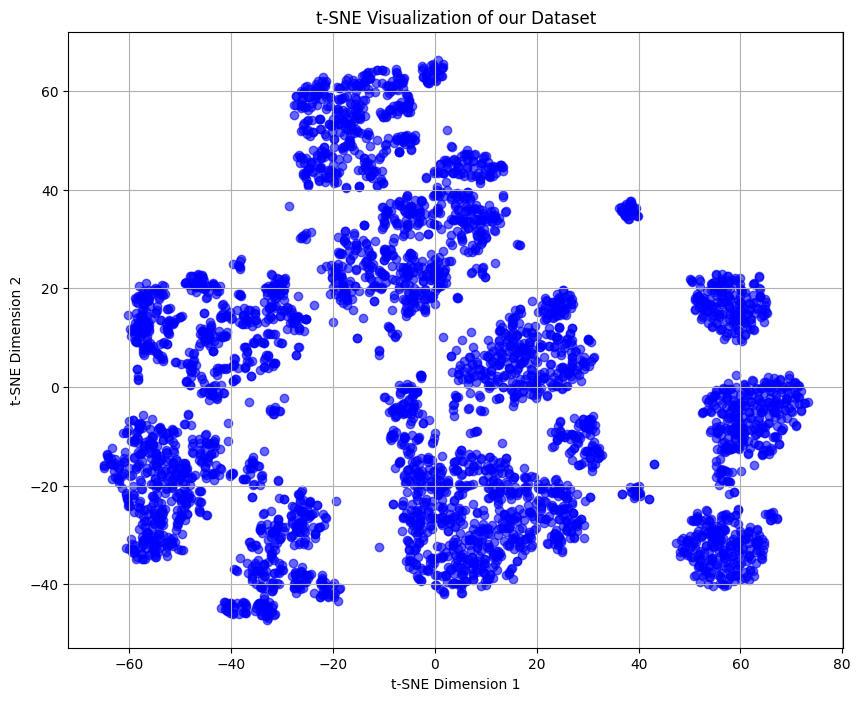

In [347]:
# Redukcja wymiarowości za pomocą t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(final_df)

# Wizualizacja wyników t-SNE w jednolitym kolorze
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], color='blue', alpha=0.6)  # użycie jednolitego koloru
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of our Dataset')
plt.grid(True)
plt.show()

### Dendrogram

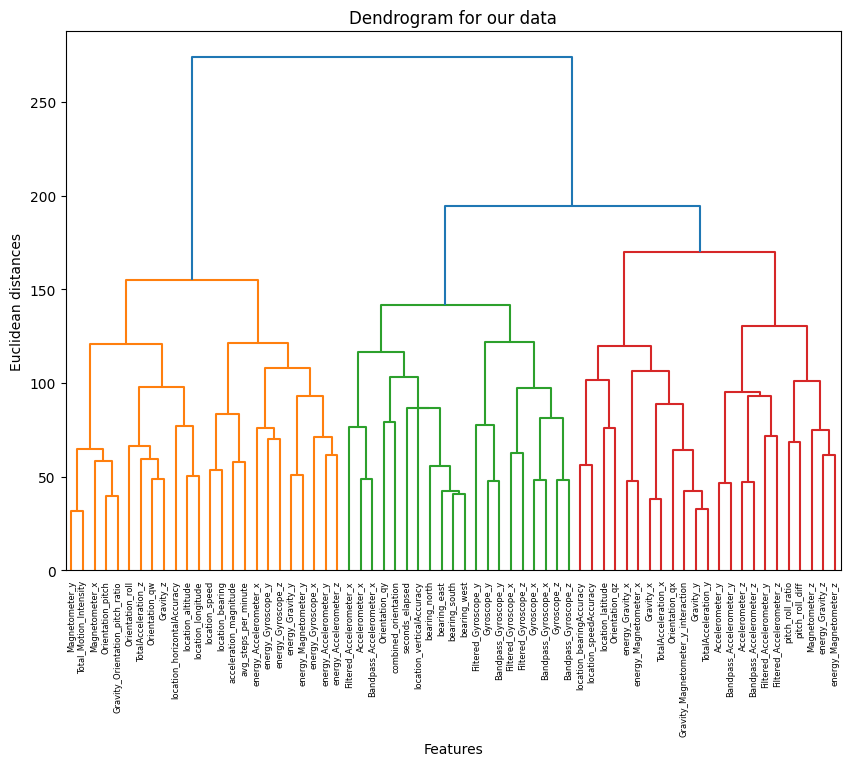

In [302]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Obliczenie macierzy odległości
Z = linkage(final_df.T, method='ward')

# Rysowanie dendrogramu
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=final_df.columns)
plt.title('Dendrogram for our data')
plt.xlabel('Features')
plt.ylabel('Euclidean distances')
plt.show()

#### The transformation that if x is the k percentile in a given column, we give it the value of the kth percentile in the normal distribution

In [344]:
from sklearn.preprocessing import QuantileTransformer

# Quantile Transformation na final_df_copy
qt = QuantileTransformer(output_distribution='normal')
final_df_transformed = qt.fit_transform(final_df_copy[columns_to_scale])

# Create a new DataFrame with transformed features, keeping the original column names
final_df_transformed = pd.DataFrame(final_df_transformed, columns=columns_to_scale)

In [345]:
def count_outliers_3sd(df):
    """
    Function to count the number of outliers in each column of a DataFrame based on the 3 standard deviations rule.
    """
    outliers_count = {}
    for column in df.columns:
        mean = df[column].mean()
        std = df[column].std()
        outliers = df[(df[column] < mean - 3 * std) | (df[column] > mean + 3 * std)]
        outliers_count[column] = len(outliers)
    return outliers_count

# Get the count of outliers for each column using the 3 standard deviation rule for the transformed data
outliers_count_3sd_transformed = count_outliers_3sd(final_df_transformed)

# Convert the outliers count dictionary to a DataFrame for display
outliers_count_df_transformed = pd.DataFrame(list(outliers_count_3sd_transformed.items()), columns=['Column', 'Outliers Count'])

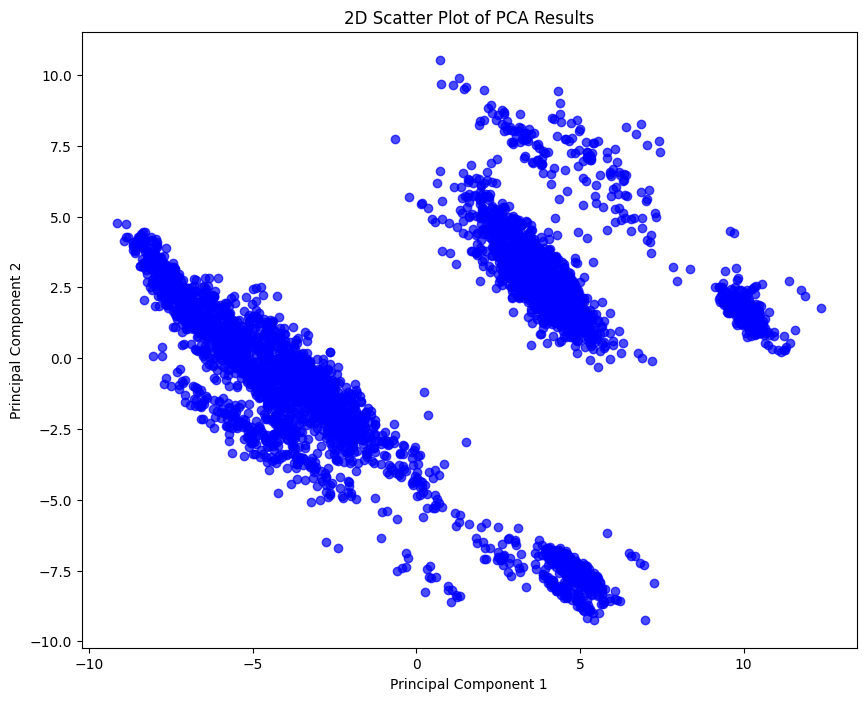

In [346]:
# Perform PCA to reduce the data to 2 dimensions
pca_2d = PCA(n_components=2)
pca_result_2d = pca_2d.fit_transform(final_df_transformed)

# Create a DataFrame with the PCA results
pca_df_2d = pd.DataFrame(pca_result_2d, columns=['PC1', 'PC2'])

# Plot the scatter plot of the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_df_2d['PC1'], pca_df_2d['PC2'], c='blue', marker='o', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot of PCA Results')
plt.show()

In [76]:
import pandas as pd
from sklearn.preprocessing import QuantileTransformer

# Select the features to transform, excluding 'label' and 'time' columns
features = final_df.columns.difference(['label', 'time'])

# Quantile Transformation
qt = QuantileTransformer(output_distribution='normal')
final_df_transformed = qt.fit_transform(final_df[features])

# Create a new DataFrame with transformed features, keeping the original column names
final_df_transformed = pd.DataFrame(final_df_transformed, columns=features)

# Display the first few rows of the transformed DataFrame
print(final_df_transformed.head())

# Assuming final_df is already defined and populated with data

# Select the features to transform, excluding 'date' and 'time' columns
features = final_df.columns.difference(['label', 'time'])

# Quantile Transformation
qt = QuantileTransformer(output_distribution='normal')
final_df_transformed = qt.fit_transform(final_df[features])

# Create a new DataFrame with transformed features, keeping the original column names
final_df_transformed = pd.DataFrame(final_df_transformed, columns=features)




   Accelerometer_x  Accelerometer_y  Accelerometer_z  Gravity_x  Gravity_y  \
0        -0.394992        -0.606355        -0.222660   0.997642   0.356250   
1         1.489832        -1.174455         1.893363  -0.242231  -0.396679   
2        -0.718118         1.347239         1.596517  -0.135751  -0.900486   
3        -2.659798         1.380760         0.976492  -0.517468  -0.820707   
4        -0.512977        -0.923568        -0.531853  -0.565782  -0.096969   

   Gravity_z  Gyroscope_x  Gyroscope_y  Gyroscope_z  Magnetometer_x  ...  \
0   0.773829     0.586476    -0.561327    -0.969427       -0.922623  ...   
1  -0.365481    -1.510087    -0.587821    -1.740155        0.897871  ...   
2   0.441012    -1.432048    -2.056438    -1.479821        1.401564  ...   
3   0.067401     1.455005     1.401078     0.536911        1.271873  ...   
4  -0.724281     1.527421     0.494999     0.793054        0.151649  ...   

   location_altitude  location_bearing  location_bearingAccuracy  \
0     

In [77]:
# Get the count of outliers for each column using the 3 standard deviation rule for the transformed data
outliers_count_3sd_transformed = count_outliers_3sd(final_df_transformed)

# Convert the outliers count dictionary to a DataFrame for display
outliers_count_df_transformed = pd.DataFrame(list(outliers_count_3sd_transformed.items()), columns=['Column', 'Outliers Count'])


# Display the DataFrame
outliers_count_df_transformed


Column  Outliers Count
0               Accelerometer_x              12
1               Accelerometer_y              13
2               Accelerometer_z              11
3                     Gravity_x              13
4                     Gravity_y              13
5                     Gravity_z              12
6                   Gyroscope_x              13
7                   Gyroscope_y              10
8                   Gyroscope_z              10
9                Magnetometer_x              13
10               Magnetometer_y              10
11               Magnetometer_z              15
12            Orientation_pitch              13
13               Orientation_qw              10
14               Orientation_qx              12
15               Orientation_qy              13
16               Orientation_qz              10
17             Orientation_roll              12
18              Orientation_yaw              13
19              Pedometer_steps               0
20          TotalAcceleration_x              12
21          TotalAcceleration_y              13
22          TotalAcceleration_z              12
23            location_altitude              19
24             location_bearing               0
25     location_bearingAccuracy               0
26  location_horizontalAccuracy              16
27            location_latitude              12
28           location_longitude              13
29               location_speed             165
30       location_speedAccuracy               0
31    location_verticalAccuracy              43
32              seconds_elapsed              12

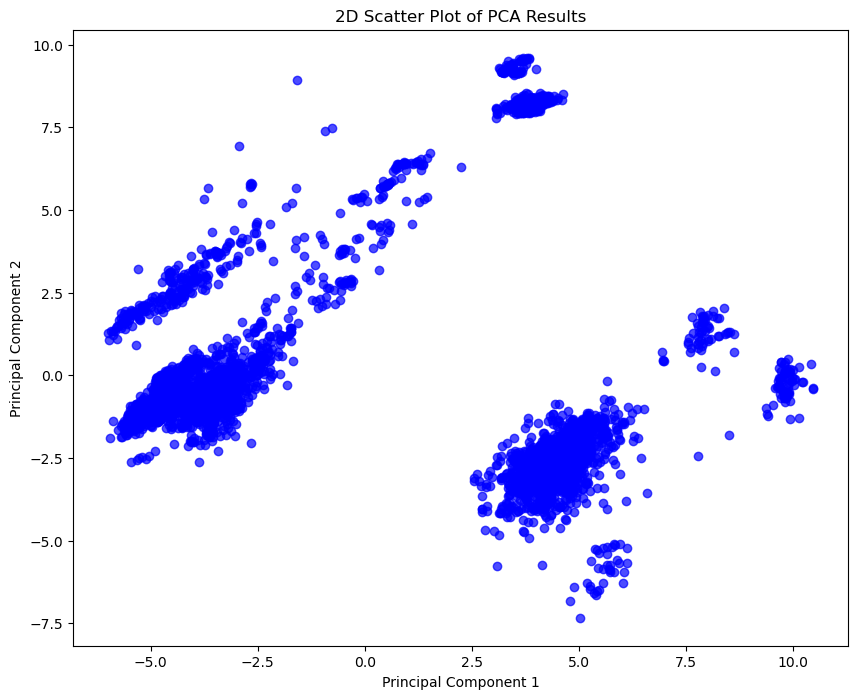

In [78]:
# Perform PCA to reduce the data to 2 dimensions
pca_2d = PCA(n_components=2)
pca_result_2d = pca_2d.fit_transform(final_df_transformed)

# Create a DataFrame with the PCA results
pca_df_2d = pd.DataFrame(pca_result_2d, columns=['PC1', 'PC2'])

# Plot the scatter plot of the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_df_2d['PC1'], pca_df_2d['PC2'], c='blue', marker='o', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot of PCA Results')
plt.show()


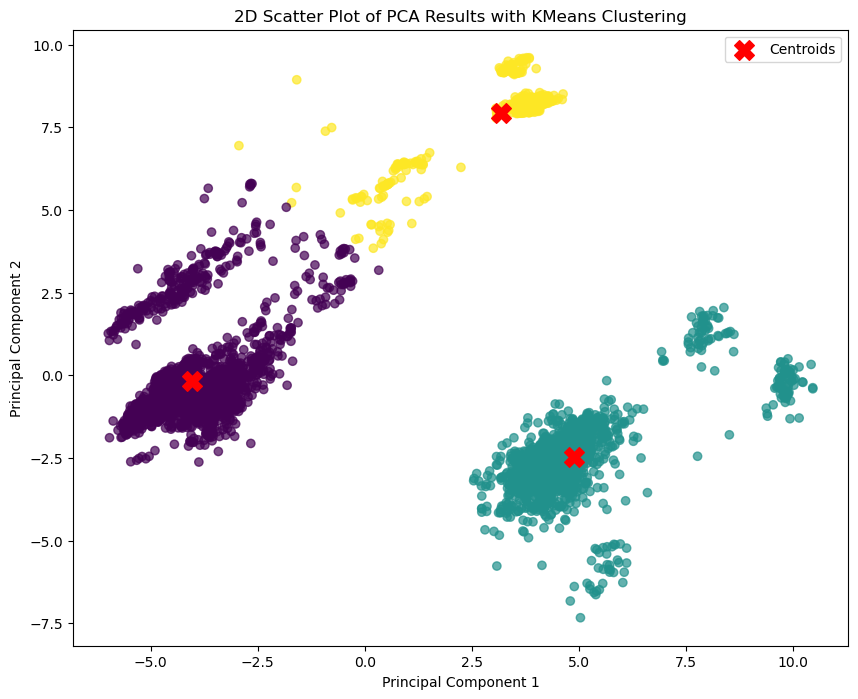

Metric                                              Value
0           Inertia                                       13466.152785
1  Silhouette Score                                           0.784653
2         Centroids  [[-4.0376167753076455, -0.1613876740192548], [...

In [79]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
import matplotlib.pyplot as plt

# Zakładamy, że final_df_transformed jest już zdefiniowane
# Perform PCA to reduce the data to 2 dimensions
pca_2d = PCA(n_components=2)
pca_result_2d = pca_2d.fit_transform(final_df_transformed)

# Create a DataFrame with the PCA results
pca_df_2d = pd.DataFrame(pca_result_2d, columns=['PC1', 'PC2'])

# Perform KMeans clustering for 3 clusters
n_clusters = 3
kmeans_2d = KMeans(n_clusters=n_clusters, random_state=0)
kmeans_2d.fit(pca_df_2d)

# Add the cluster labels to the DataFrame
pca_df_2d['Cluster'] = kmeans_2d.labels_

# Calculate important metrics
centroids_2d = kmeans_2d.cluster_centers_
inertia_2d = kmeans_2d.inertia_
silhouette_avg_2d = silhouette_score(pca_df_2d.drop(columns=['Cluster']), kmeans_2d.labels_)

# Plot the clusters in 2D space
plt.figure(figsize=(10, 8))
plt.scatter(pca_df_2d['PC1'], pca_df_2d['PC2'], c=pca_df_2d['Cluster'], cmap='viridis', marker='o', alpha=0.7)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot of PCA Results with KMeans Clustering')
plt.legend()
plt.show()


# Display the results
results_2d = {
    "Inertia": inertia_2d,
    "Silhouette Score": silhouette_avg_2d,
    "Centroids": centroids_2d.tolist()  # Convert centroids to list for DataFrame compatibility
}

# Create a DataFrame to display results
results_2d_df = pd.DataFrame(list(results_2d.items()), columns=['Metric', 'Value'])

results_2d_df
